## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from imblearn.over_sampling import SMOTE #importing SMOTE

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.initializers import he_normal

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
data = pd.read_csv('bank-1.csv')

In [ ]:
df = data.copy()

## Data Overview

In [ ]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [ ]:
df.shape

(10000, 14)

- There are a total of 10,000 rows and 14 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- As expected, the surname is a string/object.
- Geography and Gender are also string/object.
- It looks like there are no missing values, but let me look a bit deeper into the data.

In [ ]:
df.duplicated().sum()

0

- No duplicated values

In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

- There are no missing values.

In [ ]:
df['Exited'].value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

- Only 20% of the customers left the bank
- 79% of the customers remained with the bank

In [ ]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

- The minimum age of the customer is 18 years old, which makes sense because some banks require that the customer is atleast 18 years old.
- The average age in the bank is around 38 years.
- The oldest customer has an age of 92 years.
- The maximum tenure that a customer has been with the bank is 10 years.
- The minimum salary of a customer is 11.58 dollars and the maximum is around 200 thousand dollars.
- The average estimated salary is around 100 thousand dollars.
- The account balances range from 0 dollars to 251 thousand dollars, that is a huge difference.

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- The 'RowNumber', 'CustomerId', 'Surname' are unique identifier for a customer, so we can drop this column because it will not be of use.

In [ ]:
df.sample(n=10, random_state=1) #random rows of data

RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
9953       9954    15655952           Burke          550    France    Male   
3850       3851    15775293      Stephenson          680    France    Male   
4962       4963    15665088          Gordon          531    France  Female   
3886       3887    15720941            Tien          710   Germany    Male   
5437       5438    15733476        Gonzalez          543   Germany    Male   
8517       8518    15671800        Robinson          688    France    Male   
2041       2042    15709846             Yeh          840    France  Female   
1989       1990    15622454         Zaitsev          695     Spain    Male   
1933       1934    15815560           Bogle          666   Germany    Male   
9984       9985    15696175  Echezonachukwu          602   Germany    Male   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9953   47       2       0.00              2          1               1   
3850   34       3  143292.95              1          1               0   
4962   42       2       0.00              2          0               1   
3886   34       8  147833.30              2          0               1   
5437   30       6   73481.05              1          1               1   
8517   20       8  137624.40              2          1               1   
2041   39       1   94968.97              1          1               0   
1989   28       0   96020.86              1          1               1   
1933   74       7  105102.50              1          1               1   
9984   35       7   90602.42              2          1               1   

      EstimatedSalary  Exited  
9953         97057.28       0  
3850         66526.01       0  
4962         90537.47       0  
3886          1561.58       0  
5437        176692.65       0  
8517        197582.79       0  
2041         84487.62       0  
1989         57992.49       0  
1933         46172.47       0  
9984         51695.41       0

In [ ]:
for i in df.describe(include=['object']).columns:
  print("Unique values in", i, "are: ")
  print(df[i].value_counts())
  print("-" * 50)

Unique values in Surname are: 
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
--------------------------------------------------
Unique values in Geography are: 
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------------
Unique values in Gender are: 
Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------------


###Convert to categorical variable

In [ ]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
for i in cols.columns:
  df[i] = df[i].astype('category')

In [ ]:
df['Exited'] = df['Exited'].astype('category')

In [ ]:
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')

In [ ]:
df['NumOfProducts'] = df['NumOfProducts'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  category
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(7), float64(2), int64(5)
memory usage: 713.4 KB


In [ ]:
df.describe(include=['category']).T

count unique     top  freq
Surname         10000   2932   Smith    32
Geography       10000      3  France  5014
Gender          10000      2    Male  5457
NumOfProducts   10000      4       1  5084
HasCrCard       10000      2       1  7055
IsActiveMember  10000      2       1  5151
Exited          10000      2       0  7963

In [ ]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance NumOfProducts HasCrCard IsActiveMember  \
0          2       0.00             1         1              1   
1          1   83807.86             1         0              1   
2          8  159660.80             3         1              0   
3          1       0.00             2         0              0   
4          2  125510.82             1         1              1   
...      ...        ...           ...       ...            ...   
9995       5       0.00             2         1              0   
9996      10   57369.61             1         1              1   
9997       7       0.00             1         0              1   
9998       3   75075.31             2         1              0   
9999       4  130142.79             1         1              0   

      EstimatedSalary Exited  
0           101348.88      1  
1           112542.58      0  
2           113931.57      1  
3            93826.63      0  
4            79084.10      0  
...               ...    ...  
9995         96270.64      0  
9996        101699.77      0  
9997         42085.58      1  
9998         92888.52      1  
9999         38190.78      0  

[10000 rows x 14 columns]

In [ ]:
df = df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance NumOfProducts  \
0          619    France  Female   42       2       0.00             1   
1          608     Spain  Female   41       1   83807.86             1   
2          502    France  Female   42       8  159660.80             3   
3          699    France  Female   39       1       0.00             2   
4          850     Spain  Female   43       2  125510.82             1   

  HasCrCard IsActiveMember  EstimatedSalary Exited  
0         1              1        101348.88      1  
1         0              1        112542.58      0  
2         1              0        113931.57      1  
3         0              0         93826.63      0  
4         1              1         79084.10      0

## Exploratory Data Analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

####CreditScore

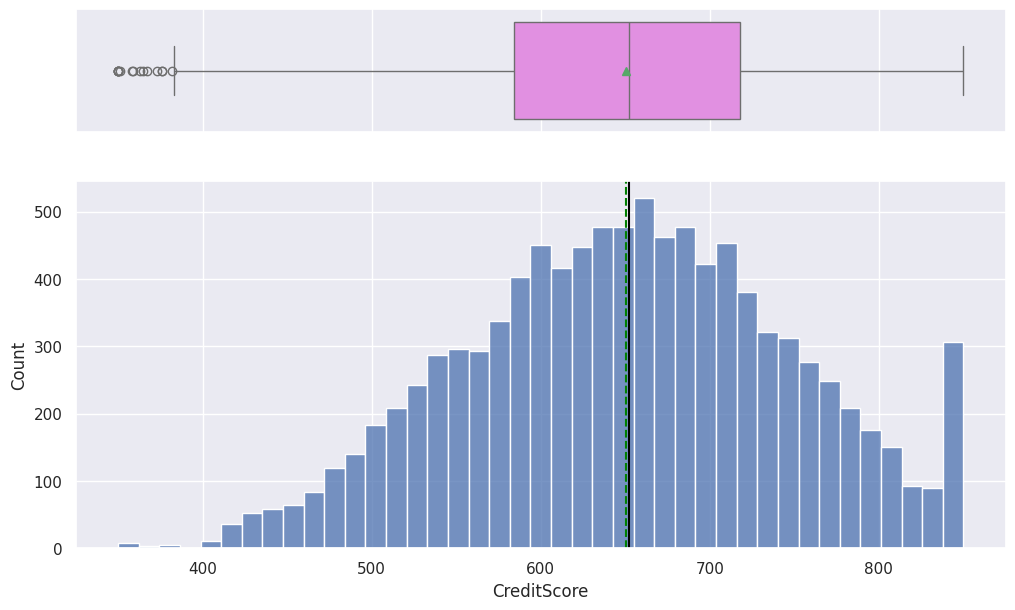

In [ ]:
histogram_boxplot(df, 'CreditScore')

- The credit score is a bit left skewed.
- Atleast 300 records have the highest credit scores.
- 50% of credit scores is between 600 and 700.
- If you look closely you can see there is a bell shaped curve, if you ignore the few records to the left.

####Geography

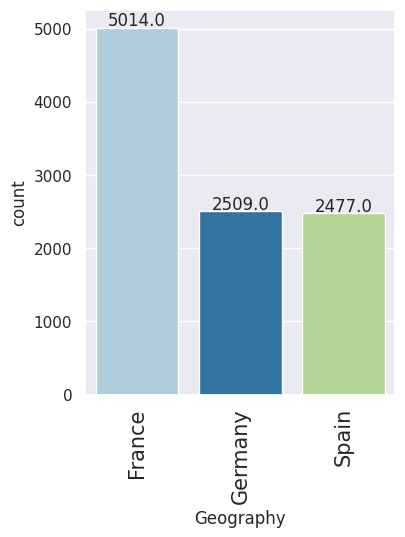

In [ ]:
labeled_barplot(df, 'Geography')

- The majority of the customers are from France.
- Germany and Spain are almost equal to each other.

####Gender

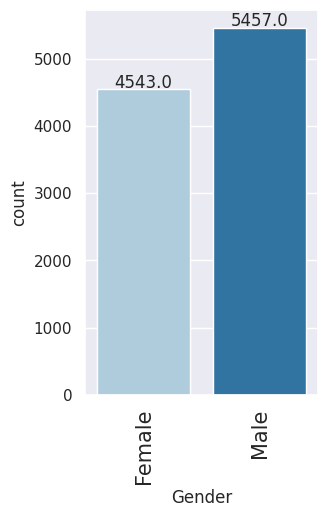

In [ ]:
labeled_barplot(df, 'Gender')

- The majority of the customers are male.
- Females are not so bad they are almost catching up to the males.

####Age

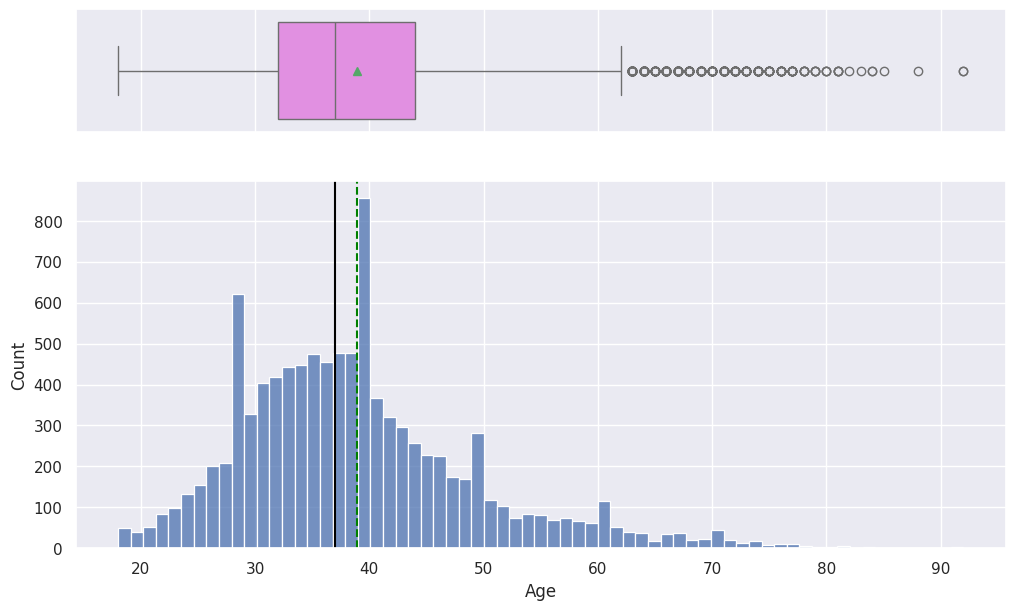

In [ ]:
histogram_boxplot(df, 'Age')

- There is an outlier to the far right that is the highest age of the customer.
- The age is right skewed, which means there are a lot of customers who are young or middle aged.
- There are 800+ records where the age is around 38-41 year olds, this is the highest age group.
- The second highest age group is 25-29 year olds.

####Tenure

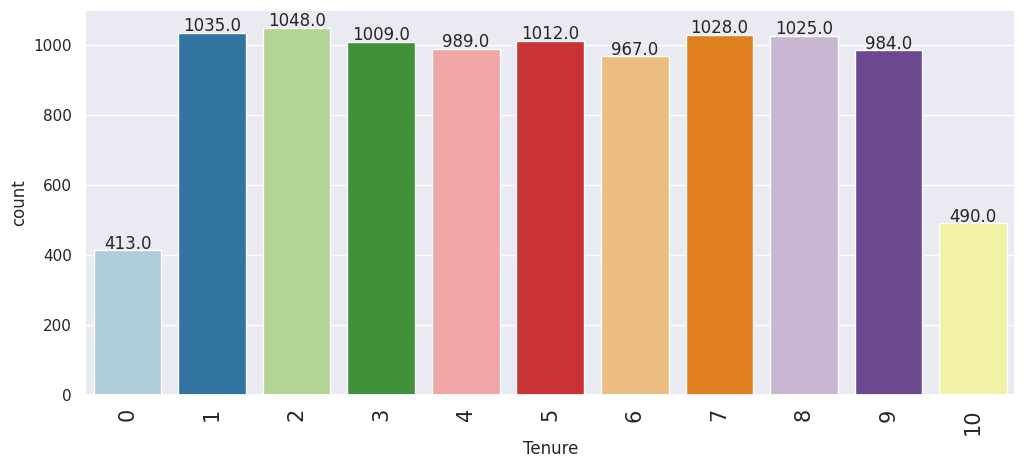

In [ ]:
labeled_barplot(df, 'Tenure')

- 413 of the customers spend 0 years with the bank. I think they recently joined the bank or they left before the first year.
- 10 years was how long they spent with the bank, which is the longest time period.

####Balance

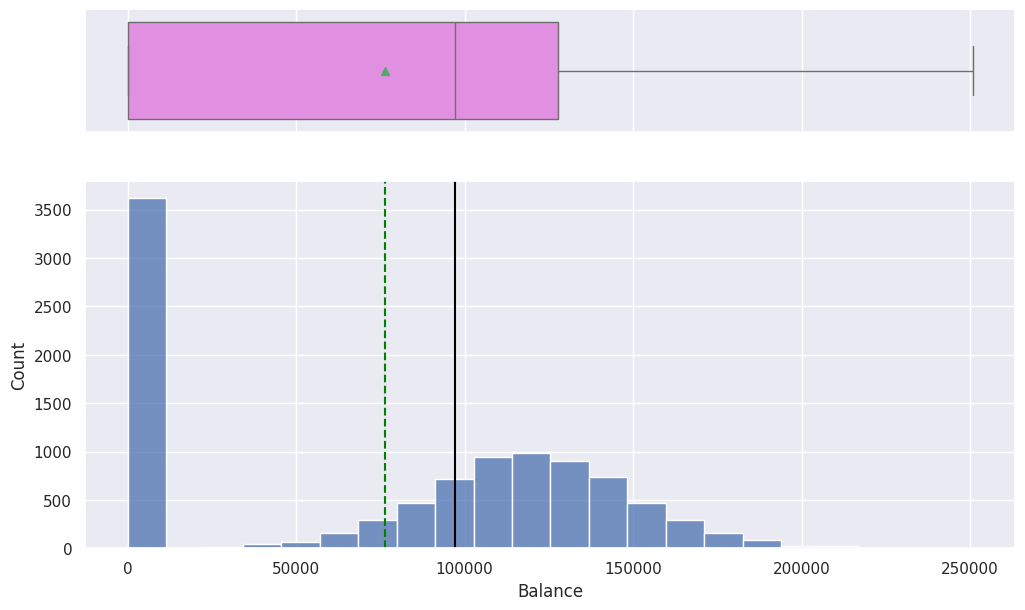

In [ ]:
histogram_boxplot(df, 'Balance')

- 3,500 customers have 0 dollars.
- If you look in the middle, you will see a bell curve.
- As the balance increases after 150K there are less customers who have a bank balance that have 150K+ money.

####Number of Products

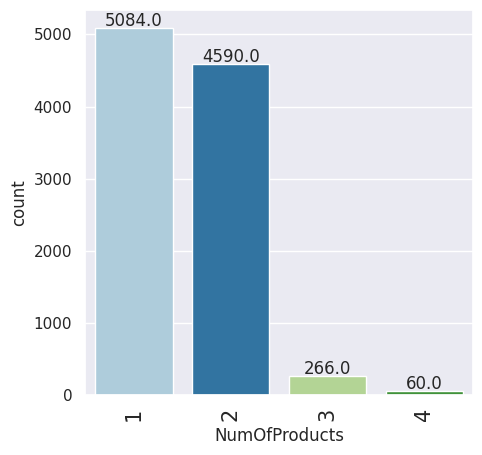

In [ ]:
labeled_barplot(df, 'NumOfProducts')

- There are 5,084 customers who purchased 1 product from the bank.
- Only 60 customers purchased 4 products from the bank.

####Has Credit Card

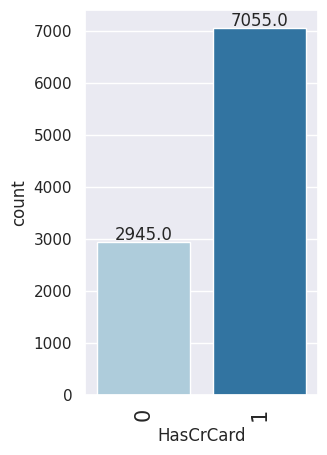

In [ ]:
labeled_barplot(df, 'HasCrCard')

- 7,055 customers have credit cards.
- 2,945 customers do not have credit cards.

####Is Active Number

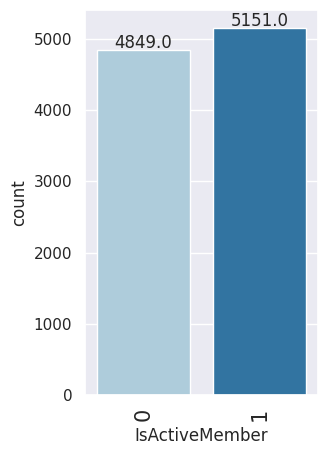

In [ ]:
labeled_barplot(df, 'IsActiveMember')

- 4,849 customers who are not an active members.
- 5,151 customers who are active members.

####Estimated Salary

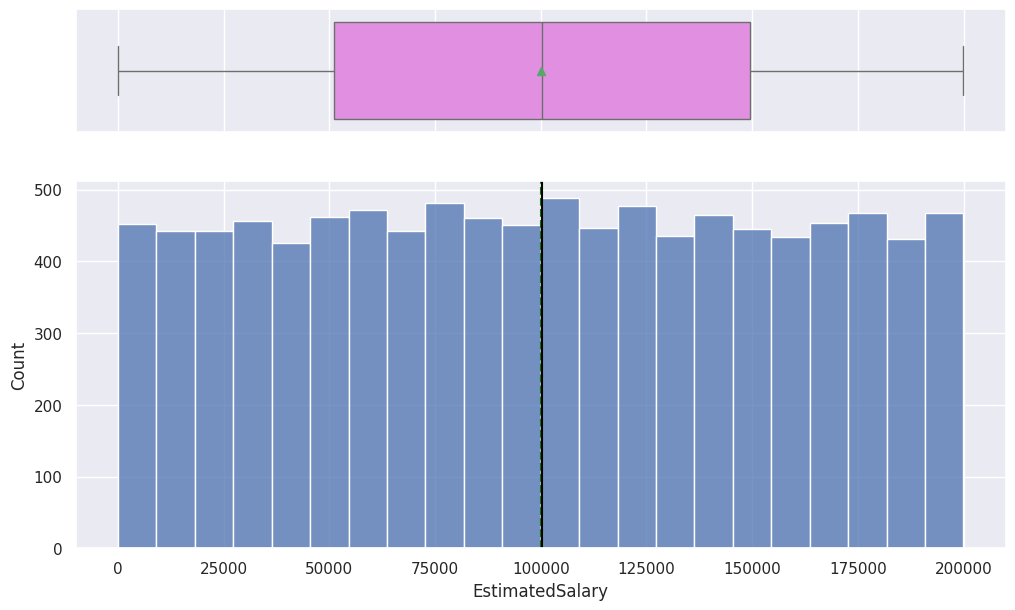

In [ ]:
histogram_boxplot(df, 'EstimatedSalary')

- 50% of the customers have an estimated salary of 100,000 dollars.
- 450+ and less than 500 sustomers have an estimated salary of 200,000 dollars.

####Exited

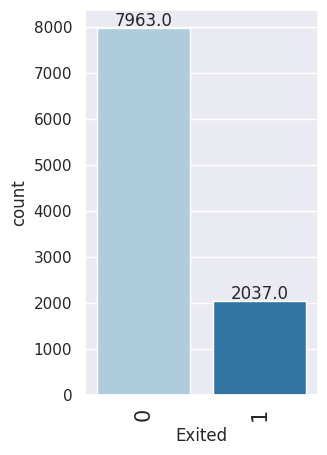

In [ ]:
labeled_barplot(df, 'Exited')

- There are 7,963 records who did not leave the bank.
- There are 2,036 records who left the bank.
- There is a huge imbalance in the target variables. We will have to fix it with SMOTE or Under sampling.

### Bivariate Analysis

#### CreditScore vs Gender

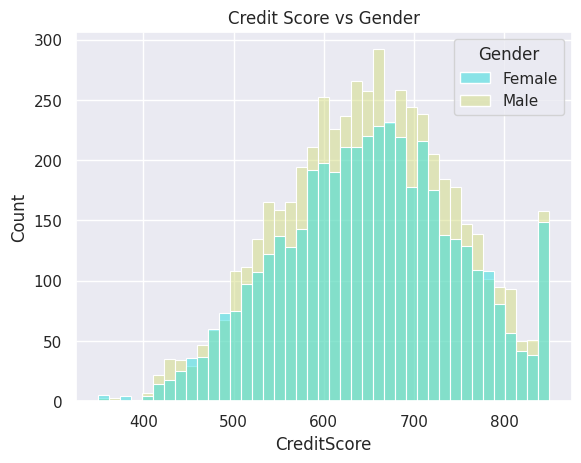

In [ ]:
plt.title('Credit Score vs Gender')
sns.histplot(data=df, x='CreditScore', hue='Gender', palette='rainbow');

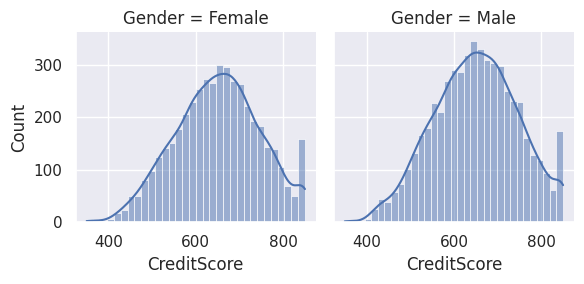

In [ ]:
g = sns.FacetGrid(df, col='Gender')
g.map(sns.histplot, 'CreditScore', kde=True);

- The credit score for the females is a bit left skewed

####Age vs Gender

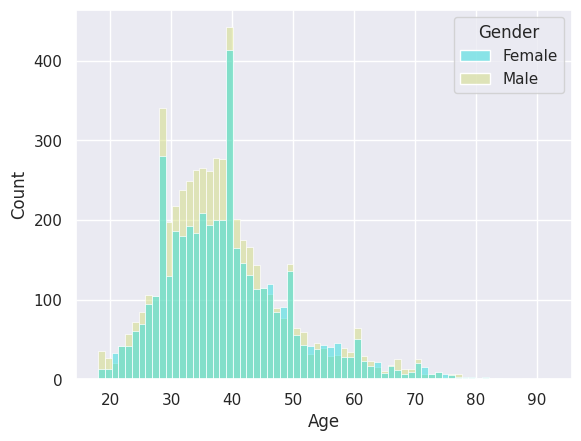

In [ ]:
sns.histplot(data=df, x='Age', hue='Gender', palette='rainbow');

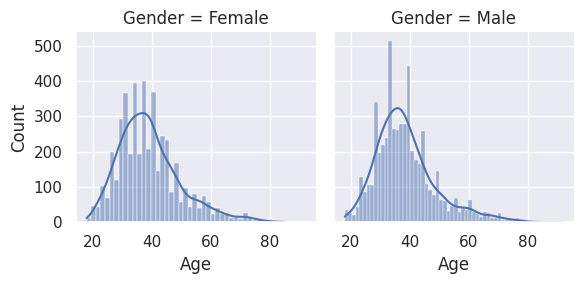

In [ ]:
a = sns.FacetGrid(df, col='Gender')
a.map(sns.histplot, 'Age', kde=True);

- The histogram is right skewed.
- Majority of the customer are in their 30-45 age group.

####Age vs Tenure

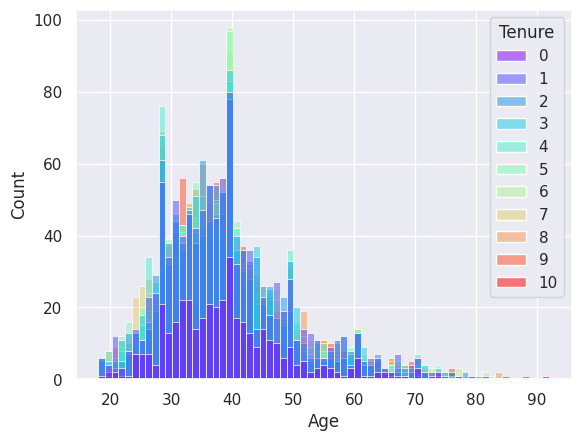

In [ ]:
sns.histplot(data=df, x='Age', hue='Tenure', palette='rainbow');

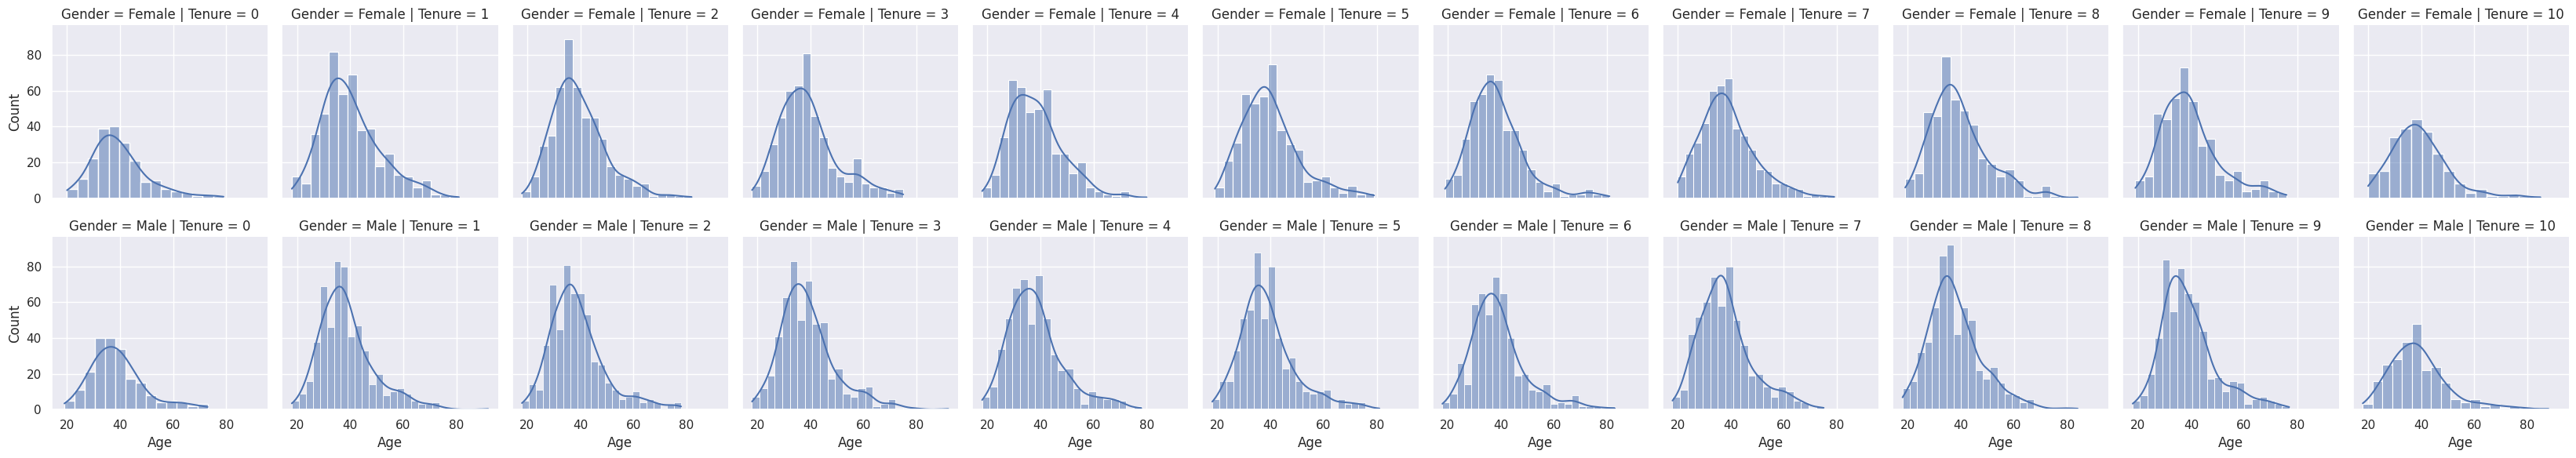

In [ ]:
t = sns.FacetGrid(df, col='Tenure', row='Gender')
t.map(sns.histplot, 'Age', kde=True);

- Right skewed.

####EstimatedSalary vs Gender

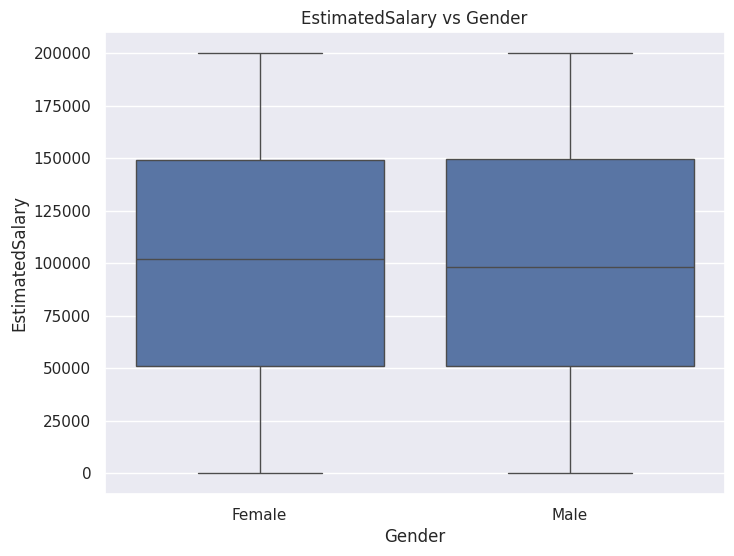

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary vs Gender')
plt.show()

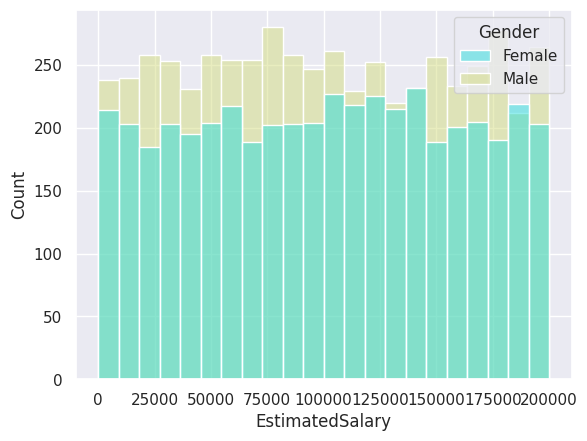

In [ ]:
sns.histplot(data=df, x='EstimatedSalary', hue='Gender', palette='rainbow');

- Females have lower estimated salary.
- The 50% range for the females is lower.

####Balance vs Gender

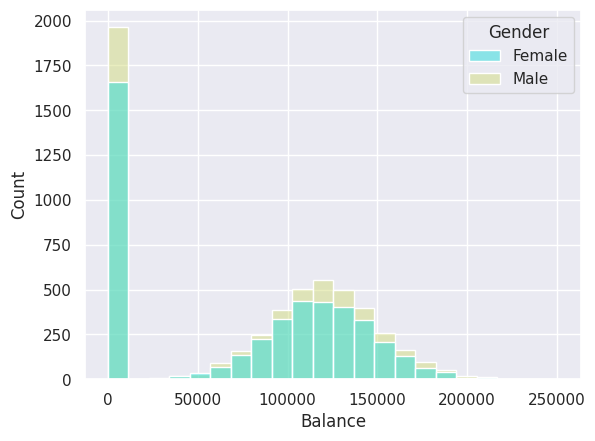

In [ ]:
sns.histplot(data=df, x='Balance', hue='Gender', palette='rainbow');

- Almost 2,000 male customers have $0 in their balance.
- The customers who have something in their balance is normally distributed.

####NumOfProducts vs EstimatedSalary

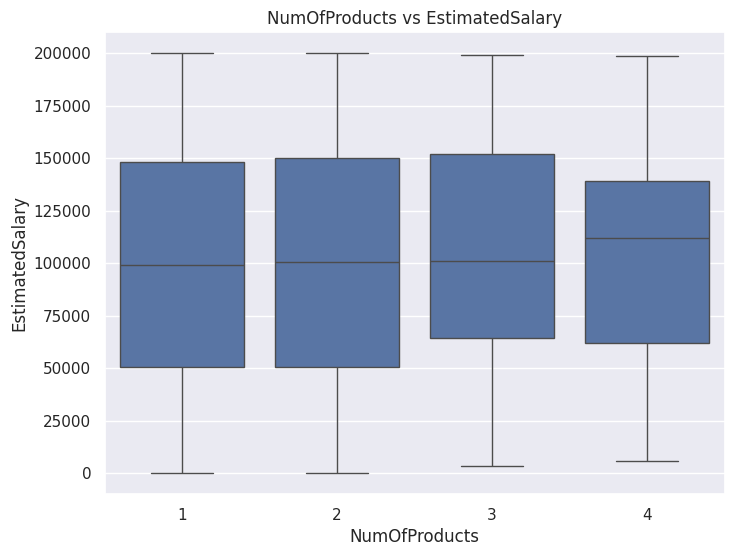

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='NumOfProducts', y='EstimatedSalary', data=df)
plt.title('NumOfProducts vs EstimatedSalary')
plt.show()

####HasCrCard vs EstimatedSalary

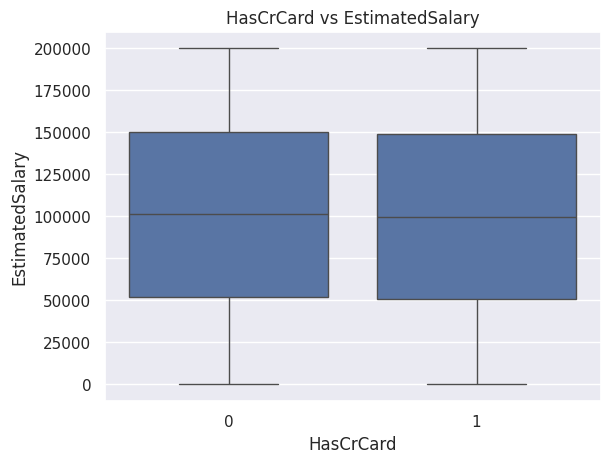

In [ ]:
sns.boxplot(x='HasCrCard', y='EstimatedSalary', data=df)
plt.title('HasCrCard vs EstimatedSalary')
plt.show()

####Gender vs NumOfProducts

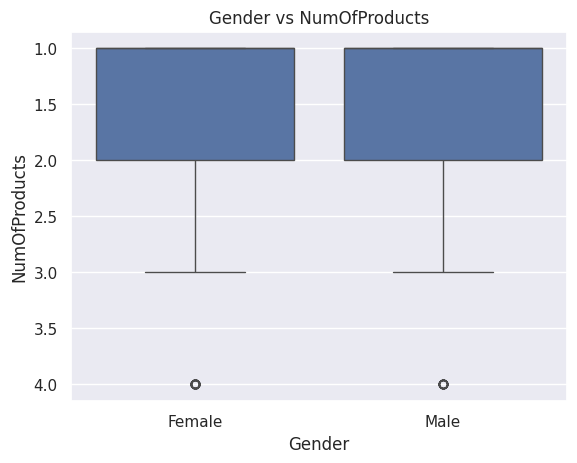

In [ ]:
sns.boxplot(x='Gender', y='NumOfProducts', data=df)
plt.title('Gender vs NumOfProducts')
plt.show()

####Tenure vs EstimatedSalary

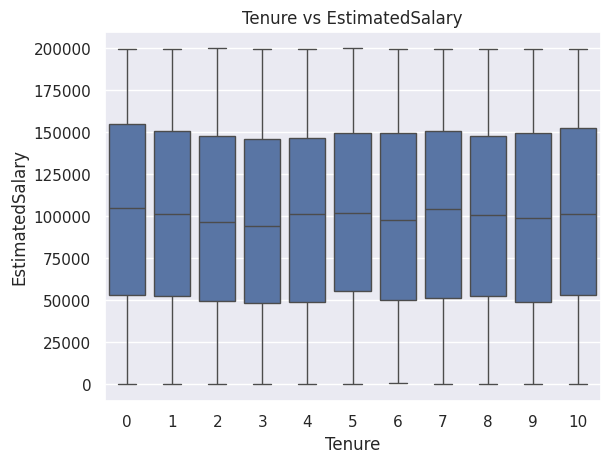

In [ ]:
sns.boxplot(x='Tenure', y='EstimatedSalary', data=df)
plt.title('Tenure vs EstimatedSalary')
plt.show()

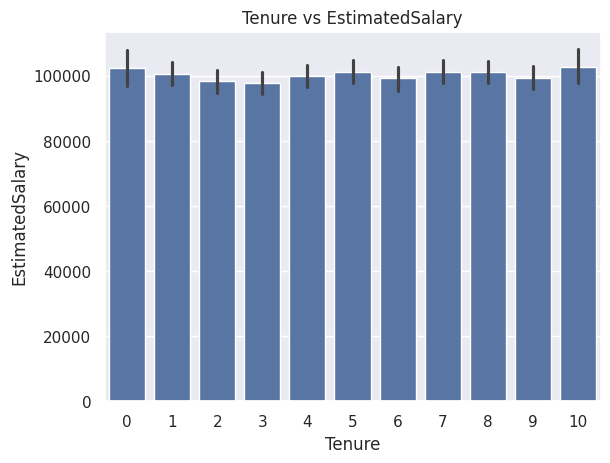

In [ ]:
sns.barplot(x='Tenure', y='EstimatedSalary', data=df)
plt.title('Tenure vs EstimatedSalary')
plt.show()

- Customers who stayed with the bank for 10 years have a slightly higher estimated salary.

####IsActiveMember vs Balance

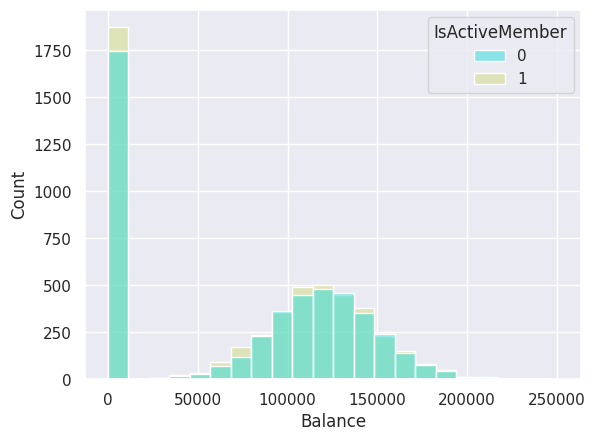

In [ ]:
sns.histplot(data=df, x='Balance', hue='IsActiveMember', palette='rainbow');

- Customers who are not active members have $0 in their balance.

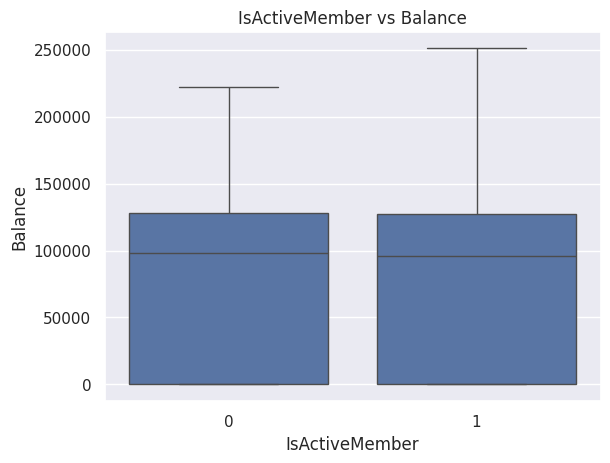

In [ ]:
sns.boxplot(x='IsActiveMember', y='Balance', data=df)
plt.title('IsActiveMember vs Balance')
plt.show();

####IsActiveMember vs EstimatedSalary

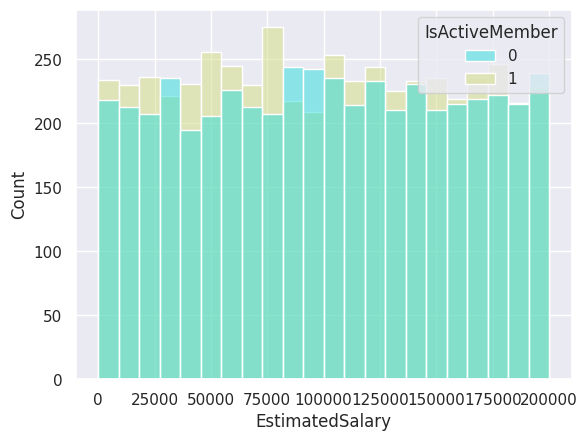

In [ ]:
sns.histplot(data=df, x='EstimatedSalary', hue='IsActiveMember', palette='rainbow');

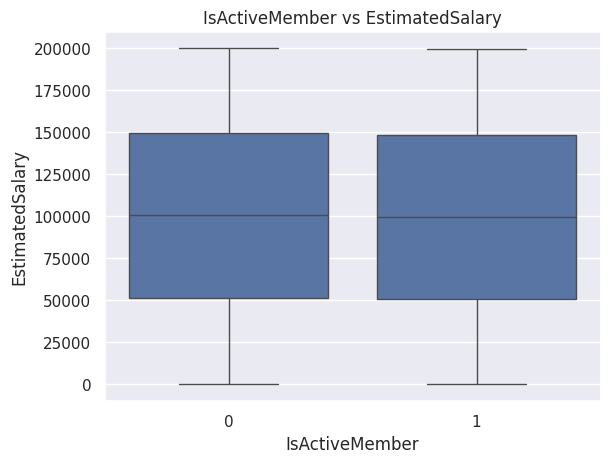

In [ ]:
sns.boxplot(x='IsActiveMember', y='EstimatedSalary', data=df)
plt.title('IsActiveMember vs EstimatedSalary')
plt.show();

####Balance vs target(Exited)

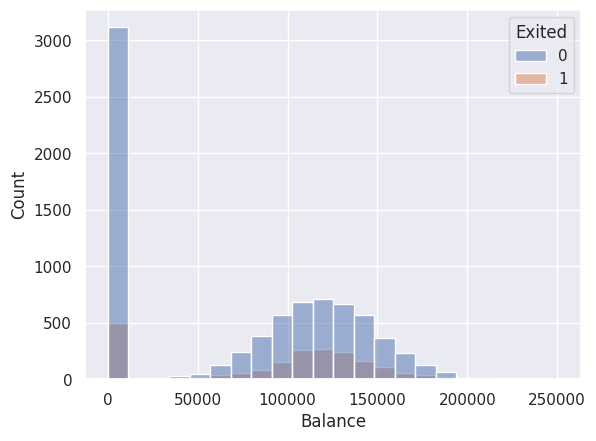

In [ ]:
sns.histplot(data=df, x='Balance', hue='Exited');

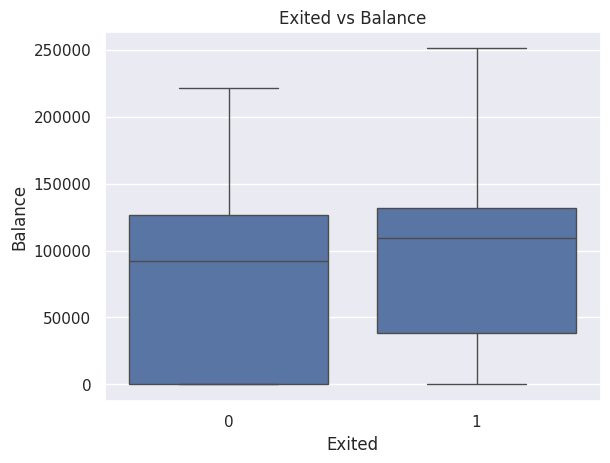

In [ ]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Exited vs Balance')
plt.show();

####EstimatedSalary vs target(Exited)

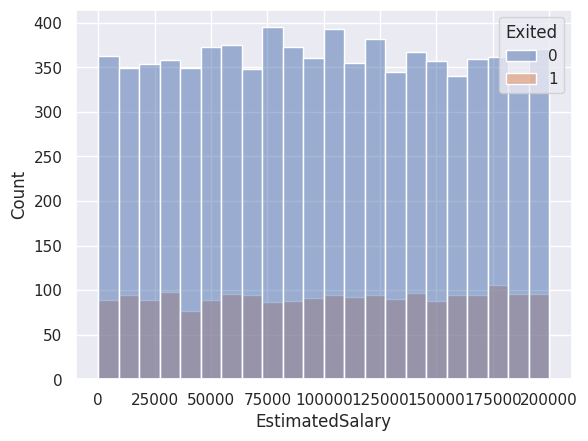

In [ ]:
sns.histplot(data=df, x='EstimatedSalary', hue='Exited');

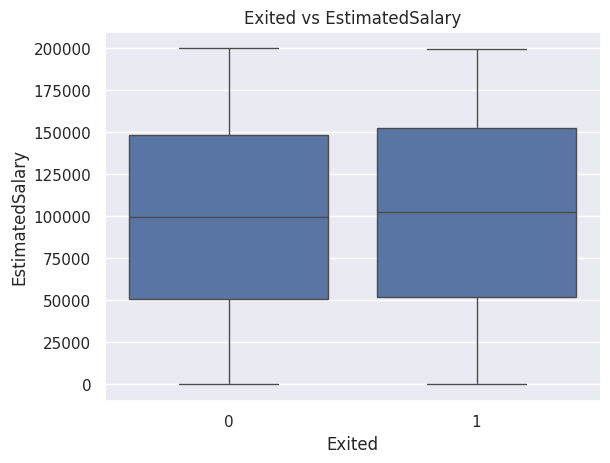

In [ ]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Exited vs EstimatedSalary')
plt.show();

####Age vs target(Exited)

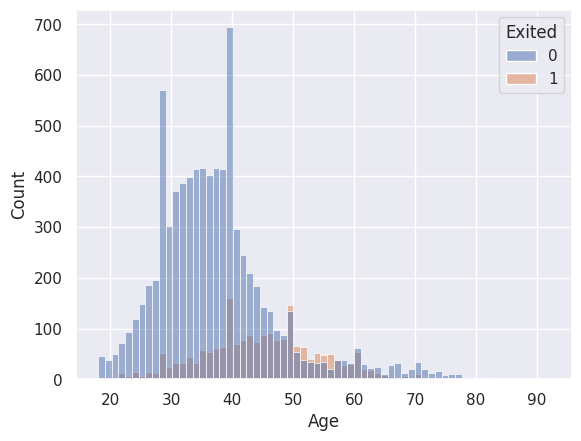

In [ ]:
sns.histplot(data=df, x='Age', hue='Exited');

- Majority of the customers who did not leave the bank are around 25 - 45 years old.

####Geography vs target(Exited)

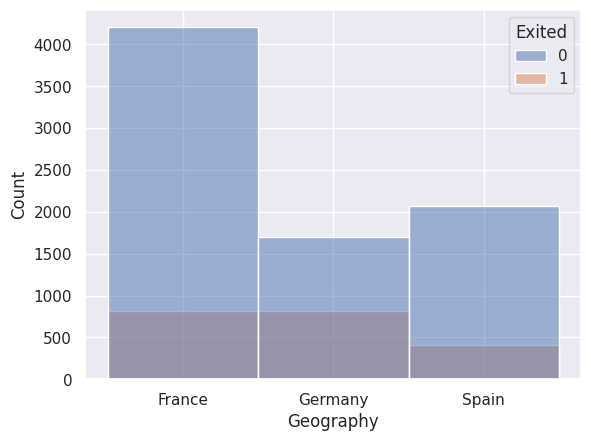

In [ ]:
sns.histplot(data=df, x='Geography', hue='Exited');

####CreditScore vs target(Exited)

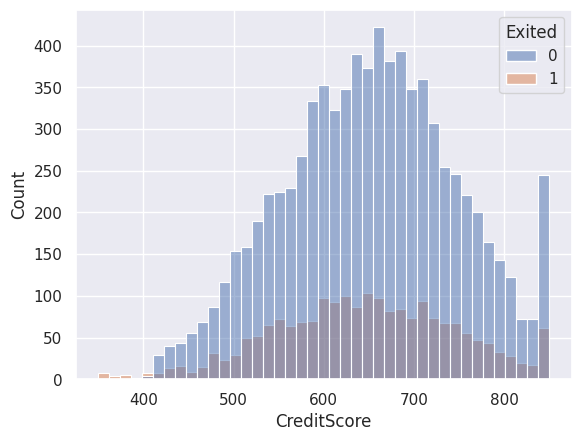

In [ ]:
sns.histplot(data=df, x='CreditScore', hue='Exited');

####Gender vs target(Exited)

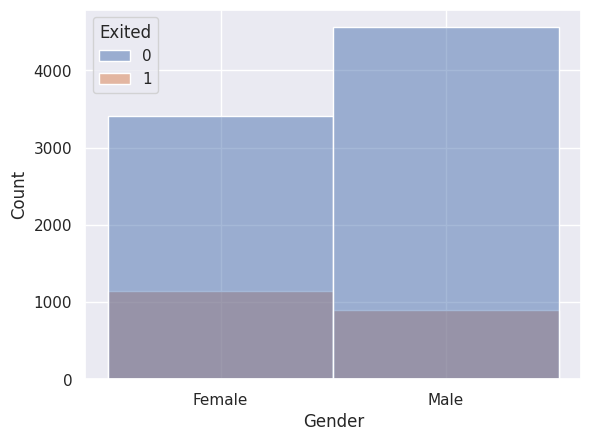

In [ ]:
sns.histplot(data=df, x='Gender', hue='Exited');

####Tenure vs target(Exited)

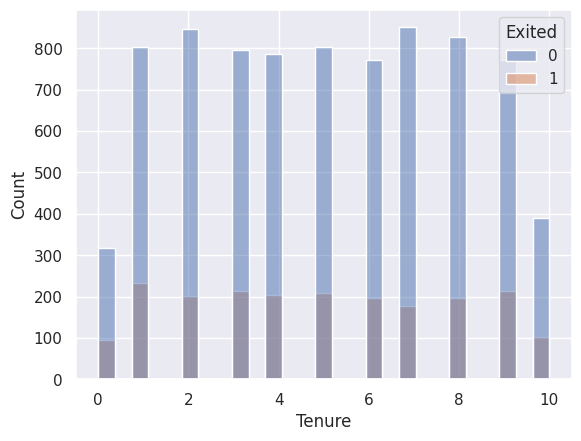

In [ ]:
sns.histplot(data=df, x='Tenure', hue='Exited');

####Correlation Check

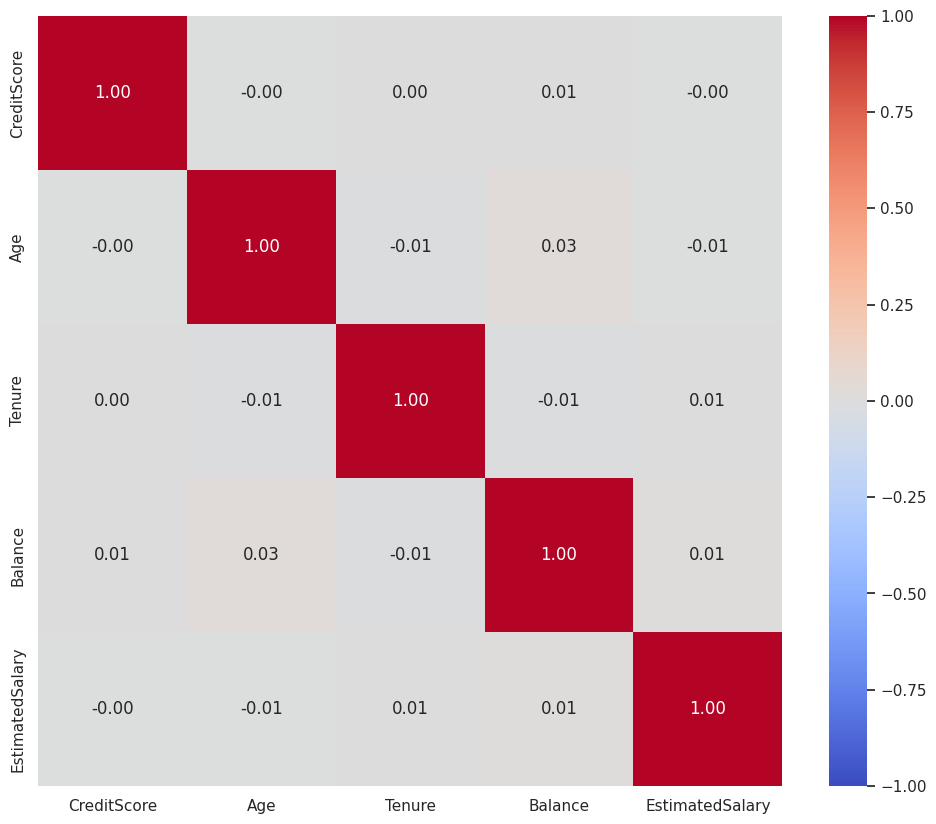

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm')
plt.show()

## Data Preprocessing

### Outlier Detection and Treatment

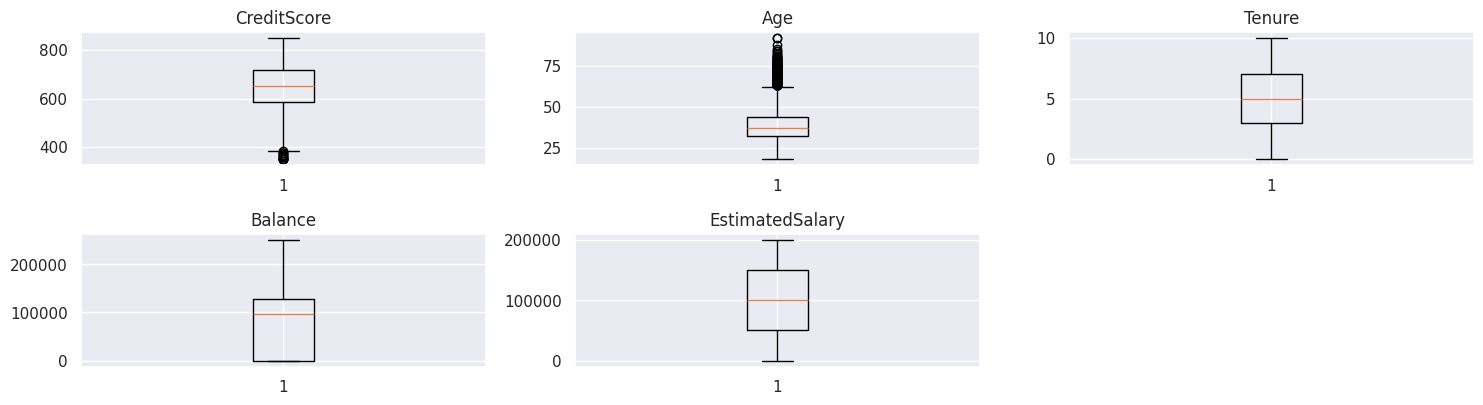

In [ ]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,12))

for i, variable in enumerate(numeric_features):
    plt.subplot(6, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- The outliers are present but they don't have to be treated.
- They are part of the data.

### Data Preparation for model building

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
X

CreditScore Geography  Gender  Age  Tenure    Balance NumOfProducts  \
0             619    France  Female   42       2       0.00             1   
1             608     Spain  Female   41       1   83807.86             1   
2             502    France  Female   42       8  159660.80             3   
3             699    France  Female   39       1       0.00             2   
4             850     Spain  Female   43       2  125510.82             1   
...           ...       ...     ...  ...     ...        ...           ...   
9995          771    France    Male   39       5       0.00             2   
9996          516    France    Male   35      10   57369.61             1   
9997          709    France  Female   36       7       0.00             1   
9998          772   Germany    Male   42       3   75075.31             2   
9999          792    France  Female   28       4  130142.79             1   

     HasCrCard IsActiveMember  EstimatedSalary  
0            1              1        101348.88  
1            0              1        112542.58  
2            1              0        113931.57  
3            0              0         93826.63  
4            1              1         79084.10  
...        ...            ...              ...  
9995         1              0         96270.64  
9996         1              1        101699.77  
9997         0              1         42085.58  
9998         1              0         92888.52  
9999         1              0         38190.78  

[10000 rows x 10 columns]

### Splitting Training, Validation, and Testing Datasets to prevent data leaks

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
    stratify=y, #ensures that the class distribution in the test set matches the original dataset
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    random_state=1,
    stratify=y_temp,
)

In [ ]:
print(f"X_train shape: {X_train.shape},{y_train.shape}")
print(f"X_val shape: {X_val.shape},{y_val.shape}")
print(f"X_test shape: {X_test.shape},{y_test.shape}")

X_train shape: (6000, 10),(6000,)
X_val shape: (2000, 10),(2000,)
X_test shape: (2000, 10),(2000,)


In [ ]:
y.value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [ ]:
y_train.value_counts(1)

Exited
0    0.796333
1    0.203667
Name: proportion, dtype: float64

In [ ]:
y_val.value_counts(1)

Exited
0    0.796
1    0.204
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(1)

Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64

### Encoding categorical variables

In [ ]:
categorical_features = X_train.select_dtypes(include='category').columns.tolist() #categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore') #initializing encoder, i am trying OneHotEncoder() instead of .get_dummies()
encoder.fit(X_train[categorical_features]) #fit encoder on train data
encoded_columns = list(encoder.get_feature_names_out(categorical_features)) #get new features after encoding

# Transform categorical features into a DataFrame
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_features]), columns=encoded_columns, index=X_train.index)
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_features]), columns=encoded_columns, index=X_val.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]), columns=encoded_columns, index=X_test.index)

# Drop original categorical columns
X_train = X_train.drop(columns=categorical_features)
X_val = X_val.drop(columns=categorical_features)
X_test = X_test.drop(columns=categorical_features)

# Concatenate with the original DataFrame
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_val = pd.concat([X_val, X_val_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [ ]:
X_train

CreditScore  Age  Tenure    Balance  EstimatedSalary  Geography_Germany  \
4472          660   23       6  166070.48         90494.72                1.0   
4034          601   42       4   96763.89        199242.65                0.0   
1454          521   34       7   70731.07         20243.97                0.0   
9099          738   29       2       0.00        170421.13                0.0   
2489          714   28       6  122724.37         67057.27                0.0   
...           ...  ...     ...        ...              ...                ...   
6444          693   37       6   95900.04         38196.24                1.0   
4806          697   33       1   87347.70        172524.51                0.0   
2622          627   27       0  185267.45         77027.34                1.0   
203           711   38       2  129022.06         14374.86                0.0   
29            411   29       0   59697.17         53483.21                0.0   

      Geography_Spain  Gender_Male  NumOfProducts_2  NumOfProducts_3  \
4472              0.0          0.0              1.0              0.0   
4034              1.0          0.0              0.0              0.0   
1454              1.0          0.0              0.0              0.0   
9099              0.0          1.0              1.0              0.0   
2489              0.0          1.0              0.0              0.0   
...               ...          ...              ...              ...   
6444              0.0          0.0              0.0              0.0   
4806              0.0          0.0              0.0              0.0   
2622              0.0          1.0              1.0              0.0   
203               0.0          0.0              1.0              0.0   
29                0.0          1.0              1.0              0.0   

      NumOfProducts_4  HasCrCard_1  IsActiveMember_1  
4472              0.0          0.0               0.0  
4034              0.0          1.0               1.0  
1454              0.0          1.0               1.0  
9099              0.0          1.0               1.0  
2489              0.0          1.0               1.0  
...               ...          ...               ...  
6444              0.0          1.0               1.0  
4806              0.0          1.0               0.0  
2622              0.0          1.0               1.0  
203               0.0          1.0               1.0  
29                0.0          1.0               1.0  

[6000 rows x 13 columns]

In [ ]:
X_val

CreditScore  Age  Tenure    Balance  EstimatedSalary  Geography_Germany  \
4693          543   32       7  147256.86        112771.95                0.0   
9364          607   49       9  119960.29        103068.22                0.0   
5424          580   44       9  143391.07        146891.07                1.0   
8533          706   34       8       0.00         37479.97                0.0   
5611          625   42       6  100047.33         93429.95                1.0   
...           ...  ...     ...        ...              ...                ...   
1475          634   26       8       0.00         21760.96                0.0   
4662          652   58       6       0.00        170025.43                0.0   
8704          784   42       2  109052.04          6409.55                0.0   
4978          540   35       7  127801.88         84239.46                1.0   
627           752   49       2   78653.84          7698.60                0.0   

      Geography_Spain  Gender_Male  NumOfProducts_2  NumOfProducts_3  \
4693              0.0          0.0              0.0              0.0   
9364              0.0          0.0              1.0              0.0   
5424              0.0          1.0              0.0              0.0   
8533              0.0          1.0              1.0              0.0   
5611              0.0          1.0              0.0              0.0   
...               ...          ...              ...              ...   
1475              0.0          1.0              0.0              0.0   
4662              1.0          1.0              1.0              0.0   
8704              1.0          0.0              1.0              0.0   
4978              0.0          1.0              0.0              0.0   
627               0.0          1.0              0.0              0.0   

      NumOfProducts_4  HasCrCard_1  IsActiveMember_1  
4693              0.0          1.0               0.0  
9364              0.0          1.0               0.0  
5424              0.0          0.0               0.0  
8533              0.0          1.0               1.0  
5611              0.0          1.0               0.0  
...               ...          ...               ...  
1475              0.0          1.0               0.0  
4662              0.0          0.0               1.0  
8704              0.0          1.0               0.0  
4978              0.0          0.0               1.0  
627               0.0          1.0               0.0  

[2000 rows x 13 columns]

In [ ]:
X_test

CreditScore  Age  Tenure    Balance  EstimatedSalary  Geography_Germany  \
4466          413   35       2       0.00         60972.84                0.0   
3754          535   35       8  118989.92        135536.72                0.0   
9601          659   33       7   89939.62        136540.09                0.0   
9758          556   43       4  125890.72         74854.97                1.0   
8577          754   65       1  136186.44        121529.59                1.0   
...           ...  ...     ...        ...              ...                ...   
7788          551   76       2  128410.71        181718.73                0.0   
1650          625   34       6       0.00        197283.20                0.0   
1276          635   37       5  113488.68         95611.74                1.0   
1043          579   35       1       0.00          4460.20                0.0   
8350          556   38       2  114756.14        193214.05                0.0   

      Geography_Spain  Gender_Male  NumOfProducts_2  NumOfProducts_3  \
4466              1.0          1.0              1.0              0.0   
3754              1.0          1.0              0.0              0.0   
9601              0.0          0.0              0.0              0.0   
9758              0.0          0.0              0.0              0.0   
8577              0.0          1.0              0.0              0.0   
...               ...          ...              ...              ...   
7788              1.0          1.0              1.0              0.0   
1650              0.0          1.0              1.0              0.0   
1276              0.0          1.0              0.0              0.0   
1043              0.0          1.0              1.0              0.0   
8350              0.0          1.0              0.0              0.0   

      NumOfProducts_4  HasCrCard_1  IsActiveMember_1  
4466              0.0          1.0               1.0  
3754              0.0          1.0               1.0  
9601              0.0          1.0               0.0  
9758              0.0          1.0               1.0  
8577              0.0          1.0               1.0  
...               ...          ...               ...  
7788              0.0          1.0               1.0  
1650              0.0          0.0               0.0  
1276              0.0          1.0               0.0  
1043              0.0          1.0               0.0  
8350              0.0          1.0               0.0  

[2000 rows x 13 columns]

### Data Normalization

In [ ]:
transformer = StandardScaler()

In [ ]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = transformer.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])
X_val[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = transformer.transform(X_val[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = transformer.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

In [ ]:
X_train

CreditScore       Age    Tenure   Balance  EstimatedSalary  \
4472     0.091585 -1.519034  0.351144  1.447084        -0.173839   
4034    -0.516304  0.279984 -0.336475  0.340252         1.713093   
1454    -1.340560 -0.477497  0.694954 -0.075495        -1.392789   
9099     0.895235 -0.950923 -1.024094 -1.205076         1.212999   
2489     0.647958 -1.045608  0.351144  0.754843        -0.580512   
...           ...       ...       ...       ...              ...   
6444     0.431591 -0.193442  0.351144  0.326456        -1.081292   
4806     0.472804 -0.572182 -1.367904  0.189874         1.249495   
2622    -0.248421 -1.140293 -1.711713  1.753661        -0.407517   
203      0.617049 -0.098757 -1.024094  0.855417        -1.494627   
29      -2.473913 -0.950923 -1.711713 -0.251707        -0.816041   

      Geography_Germany  Geography_Spain  Gender_Male  NumOfProducts_2  \
4472                1.0              0.0          0.0              1.0   
4034                0.0              1.0          0.0              0.0   
1454                0.0              1.0          0.0              0.0   
9099                0.0              0.0          1.0              1.0   
2489                0.0              0.0          1.0              0.0   
...                 ...              ...          ...              ...   
6444                1.0              0.0          0.0              0.0   
4806                0.0              0.0          0.0              0.0   
2622                1.0              0.0          1.0              1.0   
203                 0.0              0.0          0.0              1.0   
29                  0.0              0.0          1.0              1.0   

      NumOfProducts_3  NumOfProducts_4  HasCrCard_1  IsActiveMember_1  
4472              0.0              0.0          0.0               0.0  
4034              0.0              0.0          1.0               1.0  
1454              0.0              0.0          1.0               1.0  
9099              0.0              0.0          1.0               1.0  
2489              0.0              0.0          1.0               1.0  
...               ...              ...          ...               ...  
6444              0.0              0.0          1.0               1.0  
4806              0.0              0.0          1.0               0.0  
2622              0.0              0.0          1.0               1.0  
203               0.0              0.0          1.0               1.0  
29                0.0              0.0          1.0               1.0  

[6000 rows x 13 columns]

In [ ]:
X_val

CreditScore       Age    Tenure   Balance  EstimatedSalary  \
4693    -1.113890 -0.666867  0.694954  1.146629         0.212703   
9364    -0.454485  0.942780  1.382573  0.710700         0.044330   
5424    -0.732671  0.469354  1.382573  1.084892         0.804719   
8533     0.565533 -0.477497  1.038763 -1.205076        -1.093720   
5611    -0.269027  0.279984  0.351144  0.392689        -0.122908   
...           ...       ...       ...       ...              ...   
1475    -0.176298 -1.234978  1.038763 -1.205076        -1.366467   
4662     0.009160  1.794946  0.351144 -1.205076         1.206133   
8704     1.369183  0.279984 -1.024094  0.536495        -1.632836   
4978    -1.144799 -0.382812  0.694954  0.835931        -0.282376   
627      1.039480  0.942780 -1.024094  0.051033        -1.610469   

      Geography_Germany  Geography_Spain  Gender_Male  NumOfProducts_2  \
4693                0.0              0.0          0.0              0.0   
9364                0.0              0.0          0.0              1.0   
5424                1.0              0.0          1.0              0.0   
8533                0.0              0.0          1.0              1.0   
5611                1.0              0.0          1.0              0.0   
...                 ...              ...          ...              ...   
1475                0.0              0.0          1.0              0.0   
4662                0.0              1.0          1.0              1.0   
8704                0.0              1.0          0.0              1.0   
4978                1.0              0.0          1.0              0.0   
627                 0.0              0.0          1.0              0.0   

      NumOfProducts_3  NumOfProducts_4  HasCrCard_1  IsActiveMember_1  
4693              0.0              0.0          1.0               0.0  
9364              0.0              0.0          1.0               0.0  
5424              0.0              0.0          0.0               0.0  
8533              0.0              0.0          1.0               1.0  
5611              0.0              0.0          1.0               0.0  
...               ...              ...          ...               ...  
1475              0.0              0.0          1.0               0.0  
4662              0.0              0.0          0.0               1.0  
8704              0.0              0.0          1.0               0.0  
4978              0.0              0.0          0.0               1.0  
627               0.0              0.0          1.0               0.0  

[2000 rows x 13 columns]

In [ ]:
X_test

CreditScore       Age    Tenure   Balance  EstimatedSalary  \
4466    -2.453306 -0.382812 -1.024094 -1.205076        -0.686085   
3754    -1.196315 -0.382812  1.038763  0.695203         0.607704   
9601     0.081282 -0.572182  0.694954  0.231268         0.625114   
9758    -0.979948  0.374669 -0.336475  0.805410        -0.445210   
8577     1.060086  2.457742 -1.367904  0.969833         0.364661   
...           ...       ...       ...       ...              ...   
7788    -1.031464  3.499278 -1.024094  0.845654         1.409028   
1650    -0.269027 -0.477497  0.351144 -1.205076         1.679094   
1276    -0.165995 -0.193442  0.007335  0.607348        -0.085051   
1043    -0.742974 -0.382812 -1.367904 -1.205076        -1.666660   
8350    -0.979948 -0.098757 -1.024094  0.627590         1.608488   

      Geography_Germany  Geography_Spain  Gender_Male  NumOfProducts_2  \
4466                0.0              1.0          1.0              1.0   
3754                0.0              1.0          1.0              0.0   
9601                0.0              0.0          0.0              0.0   
9758                1.0              0.0          0.0              0.0   
8577                1.0              0.0          1.0              0.0   
...                 ...              ...          ...              ...   
7788                0.0              1.0          1.0              1.0   
1650                0.0              0.0          1.0              1.0   
1276                1.0              0.0          1.0              0.0   
1043                0.0              0.0          1.0              1.0   
8350                0.0              0.0          1.0              0.0   

      NumOfProducts_3  NumOfProducts_4  HasCrCard_1  IsActiveMember_1  
4466              0.0              0.0          1.0               1.0  
3754              0.0              0.0          1.0               1.0  
9601              0.0              0.0          1.0               0.0  
9758              0.0              0.0          1.0               1.0  
8577              0.0              0.0          1.0               1.0  
...               ...              ...          ...               ...  
7788              0.0              0.0          1.0               1.0  
1650              0.0              0.0          0.0               0.0  
1276              0.0              0.0          1.0               0.0  
1043              0.0              0.0          1.0               0.0  
8350              0.0              0.0          1.0               0.0  

[2000 rows x 13 columns]

In [ ]:
# Convert target variable to numerical
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario:

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want `Recall` to be maximized as greater the `Recall`, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.


In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    # Convert predicted probabilities to class labels (0 or 1)
    y_pred = (y_pred > 0.5).astype(int) # added this line
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train accuracy","validation accuracy", "time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

### Model 0 - Neural Network with SGD Optimizer

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

- Fully connected layers

In [ ]:
model0 = Sequential()

model0.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model0.add(Dense(256, activation="relu")) #hidden layer(256)
model0.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

**How did I get those parameters?**

```
1st layer (input/hidden layer):
(X_train(13 features/columns) * 128 neurons) + 128 neurons = 1,792 parameters
```

```
2nd layer (hidden layer):
(128 neurons(from previous layer) * 256 neurons) + 256 neurons = 33,024 parameters
```

```
3rd layer (output layer):
(256 neurons(from previous layer) * 1 neuron) + 1 neuron = 257 parameters
```

```
Total Parameters:
1,792 parameters + 33,024 parameters + 257 parameters = 35,073 parameters
```

In [ ]:
optimizer = tf.keras.optimizers.SGD() #SGD optimizer
model0.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 10 #epochs

start = time.time() #starting time

history = model0.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7127 - loss: 0.6121 - val_accuracy: 0.7960 - val_loss: 0.4902
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4816 - val_accuracy: 0.7960 - val_loss: 0.4685
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.4676 - val_accuracy: 0.7960 - val_loss: 0.4572
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.4537 - val_accuracy: 0.7960 - val_loss: 0.4478
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.4569 - val_accuracy: 0.7960 - val_loss: 0.4394
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4362 - val_accuracy: 0.7955 - val_loss: 0.4322
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4296 - val_accuracy: 0.7990 - val_loss: 0.4259
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.4396 - val_accuracy: 0.7995 - val_loss

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.5291969776153564


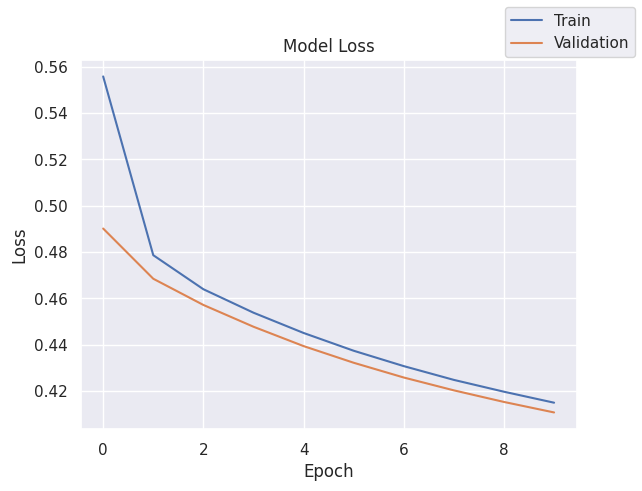

In [ ]:
plot(history, "loss")

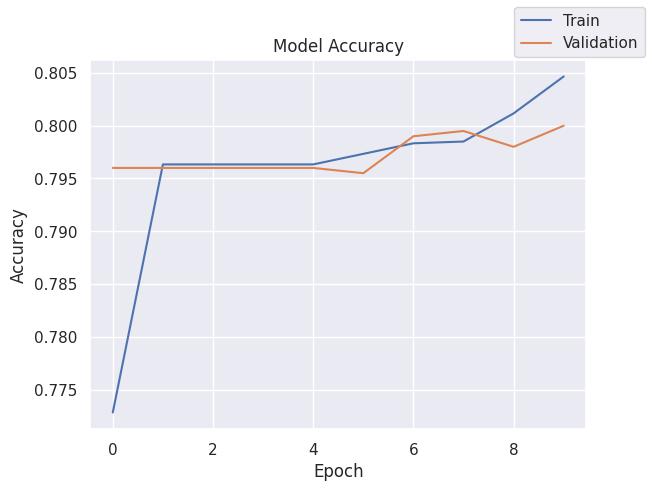

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[0] = [2,[128,256],['relu','relu'],10,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   

   train accuracy  validation accuracy  time (secs)  
0        0.804667                  0.8         5.53

In [ ]:
model_0_train_perf = model_performance_classification(model0, X_train, y_train)
model_0_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy  Recall  Precision  F1 Score
0     0.806   0.806   0.778758  0.744559

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


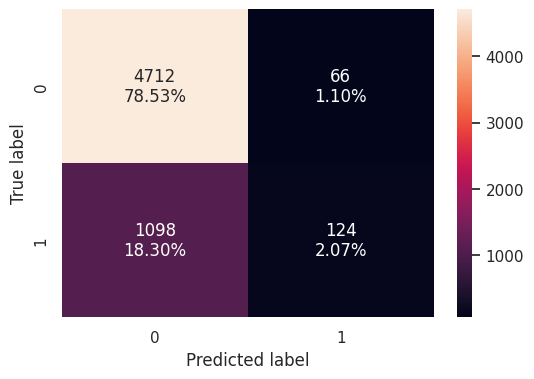

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
model_0_val_perf = model_performance_classification(model0, X_val, y_val)
model_0_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0       0.8     0.8   0.758361  0.734796

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


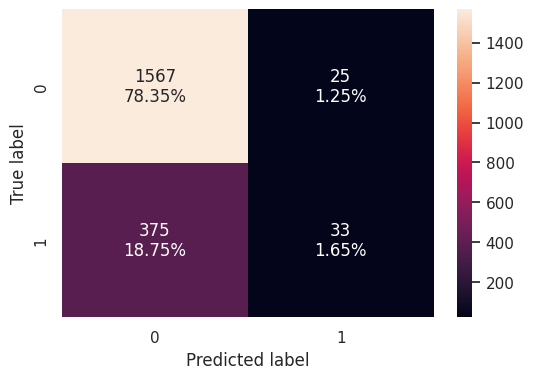

In [ ]:
confusion_matrix_sklearn(model0, X_val, y_val)

- This model has 2 hidden layers.
- Both the hidden layers use relu as activation function.
- I will try increasing the number of epochs to see if the the loss goes down and recall, accuracy improves.

### Model 1 - Neural Network with SGD Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model1 = Sequential()

model1.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model1.add(Dense(256, activation="relu")) #hidden layer(256)
model1.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD() #SGD optimizer
model1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 50 #epochs

start = time.time() #starting time

history = model1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6564 - loss: 0.6229 - val_accuracy: 0.7960 - val_loss: 0.4889
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.4710 - val_accuracy: 0.7960 - val_loss: 0.4620
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7947 - loss: 0.4563 - val_accuracy: 0.7960 - val_loss: 0.4480
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7901 - loss: 0.4507 - val_accuracy: 0.7960 - val_loss: 0.4370
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4330 - val_accuracy: 0.7960 - val_loss: 0.4281
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7936 - loss: 0.4295 - val_accuracy: 0.8010 - val_loss: 0.4207
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.4287 - val_accuracy: 0.8005 - val_loss: 0.4146
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8008 - loss: 0.4205 - val_accuracy: 0.8010 - val_loss

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.61411738395691


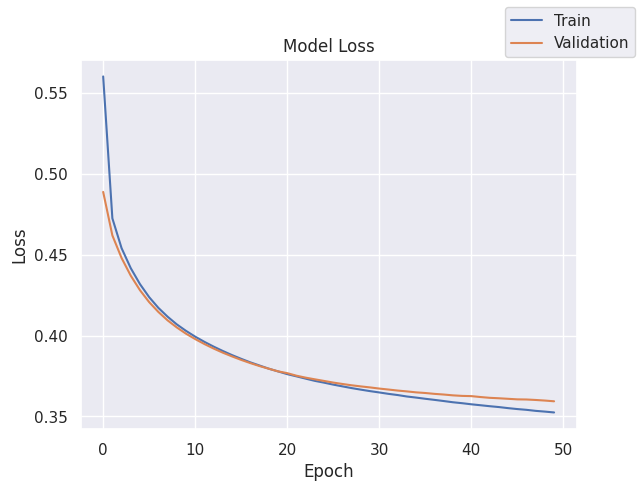

In [ ]:
plot(history, "loss")

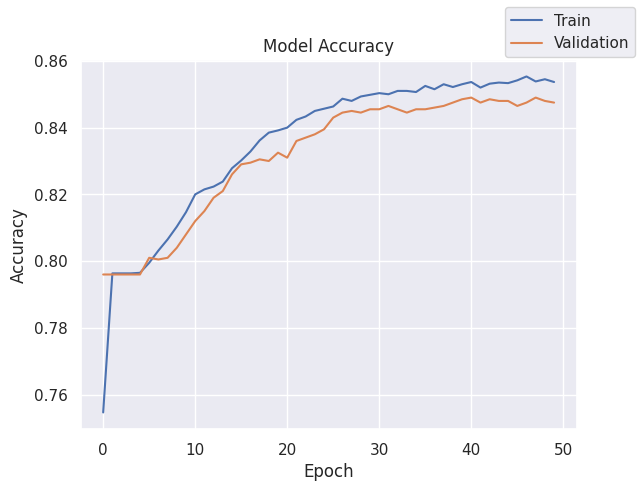

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[1] = [2,[128,256],['relu','relu'],50,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61

In [ ]:
model_1_train_perf = model_performance_classification(model1, X_train, y_train)
model_1_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8545  0.8545   0.843452   0.84124

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


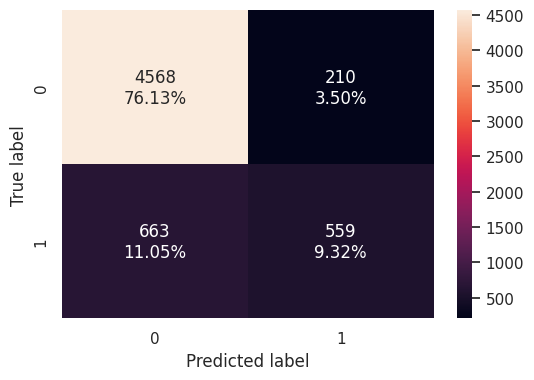

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
model_1_val_perf = model_performance_classification(model1, X_val, y_val)
model_1_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8475  0.8475   0.834748   0.83218

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


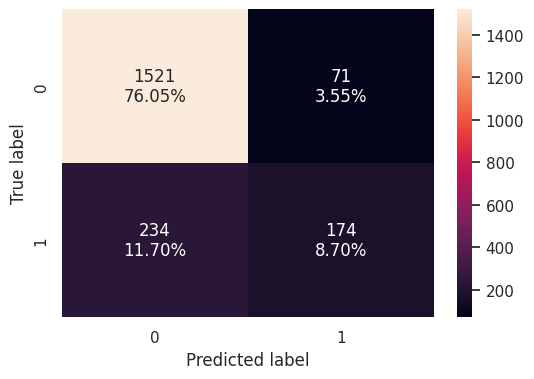

In [ ]:
confusion_matrix_sklearn(model1, X_val, y_val)

- This model is slightly better than model0.
- However, it can still improve it's performance.
- Next, i'll increase only the number of epochs again to see if the metrics improve.
- The model is slightly overfitting to the training data.

### Model 2 - Neural Network with SGD Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model2 = Sequential()

model2.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model2.add(Dense(256, activation="relu")) #hidden layer(256)
model2.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD() #SGD optimizer
model2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6320 - loss: 0.6363 - val_accuracy: 0.7960 - val_loss: 0.4939
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4823 - val_accuracy: 0.7960 - val_loss: 0.4646
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 - loss: 0.4553 - val_accuracy: 0.7960 - val_loss: 0.4503
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7981 - loss: 0.4429 - val_accuracy: 0.7960 - val_loss: 0.4395
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.4328 - val_accuracy: 0.8000 - val_loss: 0.4311
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.4237 - val_accuracy: 0.8005 - val_loss: 0.4241
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8031 - loss: 0.4285 - val_accuracy: 0.8025 - val_loss: 0.4184
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 0.4241 - val_accuracy: 0.8050 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  34.36121988296509


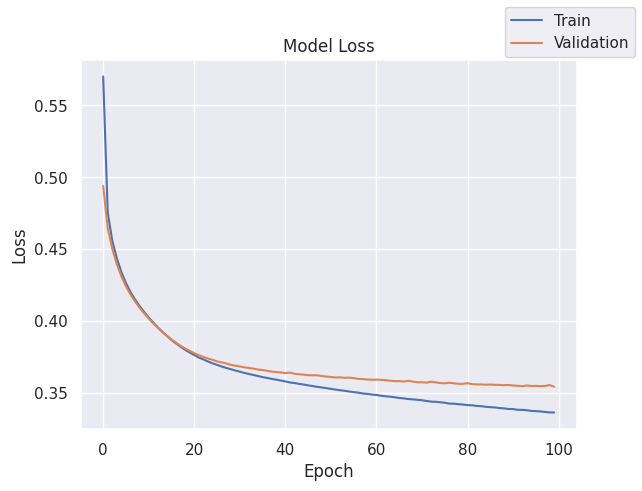

In [ ]:
plot(history, "loss")

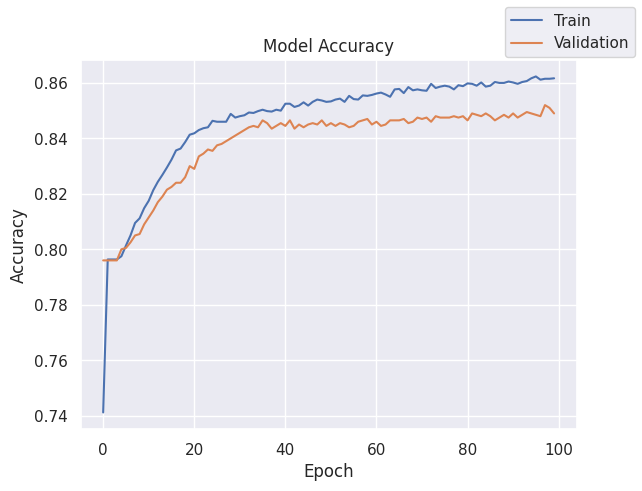

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[2] = [2,[128,256],['relu','relu'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   
2                2               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   
2                        [relu, relu]       100          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   
2                  -              -    0.336479         0.354381   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61  
2        0.861667               0.8490        34.36

In [ ]:
model_2_train_perf = model_performance_classification(model2, X_train, y_train)
model_2_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.861667  0.861667   0.852541  0.848661

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


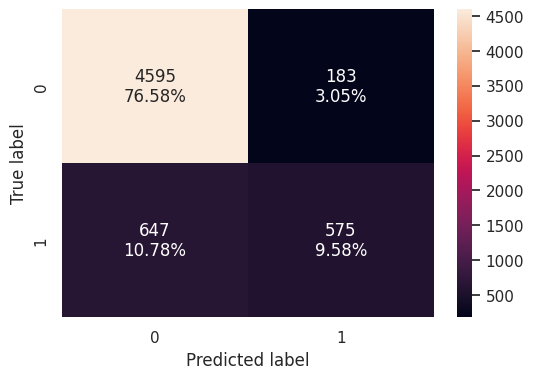

In [ ]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [ ]:
model_2_val_perf = model_performance_classification(model2, X_val, y_val)
model_2_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.849   0.849   0.836622   0.83492

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


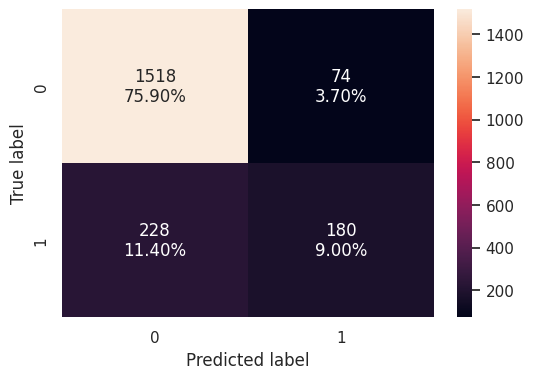

In [ ]:
confusion_matrix_sklearn(model2, X_val, y_val)

- Hmmm, the metrics did not change that much and the loss did not decrease that much either.
- I will try to use tanh for the 2nd hidden layer.
- The model is slightly overfitting to the training data.

### Model 3 - Neural Network with SGD Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model3 = Sequential()

model3.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model3.add(Dense(256, activation="tanh")) #hidden layer(256)
model3.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD() #SGD optimizer
model3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model3.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6878 - loss: 0.6039 - val_accuracy: 0.7960 - val_loss: 0.4815
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4682 - val_accuracy: 0.7975 - val_loss: 0.4512
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4453 - val_accuracy: 0.7960 - val_loss: 0.4333
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 0.4179 - val_accuracy: 0.7965 - val_loss: 0.4217
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 0.4117 - val_accuracy: 0.8015 - val_loss: 0.4136
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8152 - loss: 0.4059 - val_accuracy: 0.8050 - val_loss: 0.4077
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8110 - loss: 0.4111 - val_accuracy: 0.8070 - val_loss: 0.4028
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8142 - loss: 0.3995 - val_accuracy: 0.8125 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  33.41947793960571


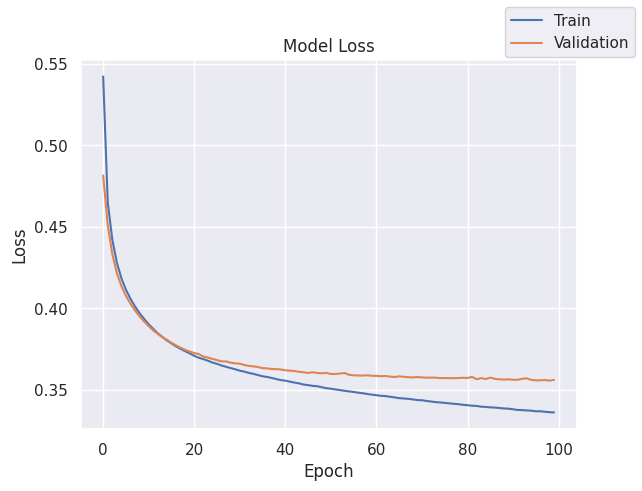

In [ ]:
plot(history, "loss")

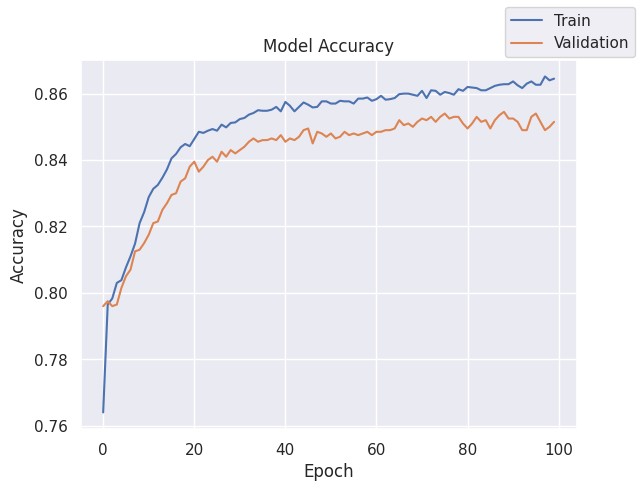

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[3] = [2,[128,256],['relu','tanh'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   
2                2               [128, 256]   
3                2               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   
2                        [relu, relu]       100          64   
3                        [relu, tanh]       100          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   
2                  -              -    0.336479         0.354381   
3                  -              -    0.336105         0.356086   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61  
2        0.861667               0.8490        34.36  
3        0.864500               0.8515        33.42

In [ ]:
model_3_train_perf = model_performance_classification(model3, X_train, y_train)
model_3_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.864833  0.864833   0.856869  0.851439

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


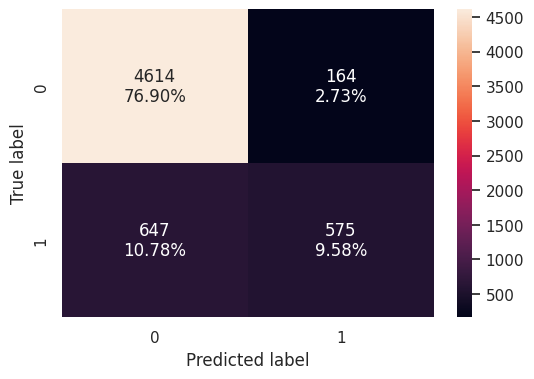

In [ ]:
confusion_matrix_sklearn(model3, X_train, y_train)

In [ ]:
model_3_val_perf = model_performance_classification(model3, X_val, y_val)
model_3_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8515  0.8515   0.840196  0.835349

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


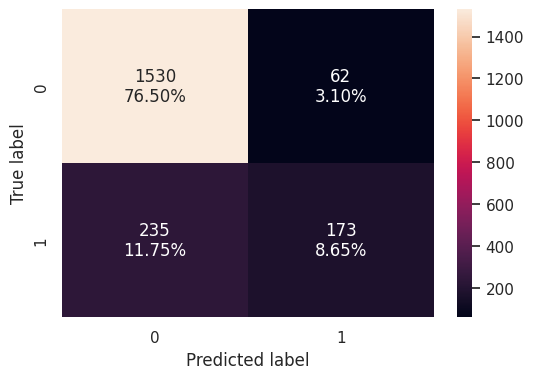

In [ ]:
confusion_matrix_sklearn(model3, X_val, y_val)

- The performance did not improve at all.
- So I will use different hyperparameters to try to increase the accuracy, recall metrics and also decrease the loss.
- I will now use Adam optimizer instead of SGD optimizer.

### Model 4 - Neural Network with Adam Optimizer

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model4 = Sequential()

model4.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model4.add(Dense(256, activation="tanh")) #hidden layer(256)
model4.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam() #Adam optimizer
model4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model4.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7984 - loss: 0.4722 - val_accuracy: 0.8380 - val_loss: 0.3743
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8446 - loss: 0.3690 - val_accuracy: 0.8495 - val_loss: 0.3607
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.3555 - val_accuracy: 0.8525 - val_loss: 0.3563
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.3490 - val_accuracy: 0.8500 - val_loss: 0.3590
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - loss: 0.3496 - val_accuracy: 0.8445 - val_loss: 0.3619
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3392 - val_accuracy: 0.8485 - val_loss: 0.3561
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.3376 - val_accuracy: 0.8485 - val_loss: 0.3549
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8620 - loss: 0.3340 - val_accuracy: 0.8470 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  35.535656452178955


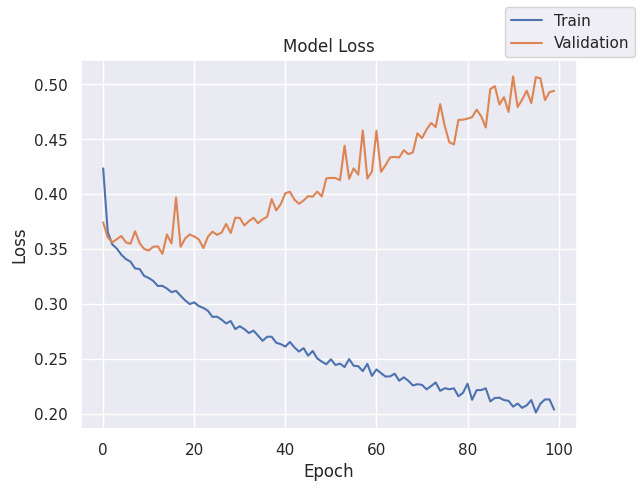

In [ ]:
plot(history, "loss")

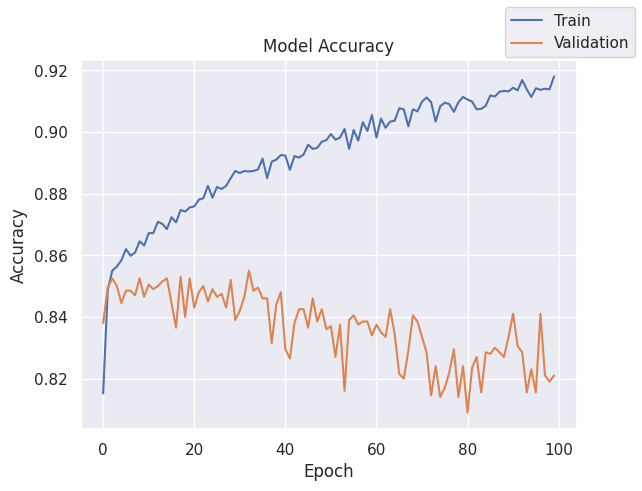

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[4] = [2,[128,256],['relu','tanh'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   
2                2               [128, 256]   
3                2               [128, 256]   
4                2               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   
2                        [relu, relu]       100          64   
3                        [relu, tanh]       100          64   
4                        [relu, tanh]       100          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   
2                  -              -    0.336479         0.354381   
3                  -              -    0.336105         0.356086   
4                  -              -    0.203989         0.493901   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61  
2        0.861667               0.8490        34.36  
3        0.864500               0.8515        33.42  
4        0.918000               0.8210        35.54

In [ ]:
model_4_train_perf = model_performance_classification(model4, X_train, y_train)
model_4_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0     0.925   0.925    0.92332  0.923763

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


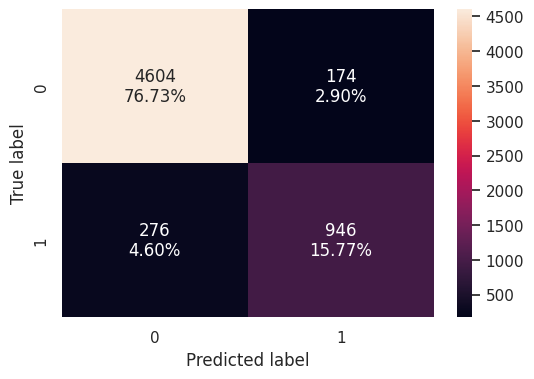

In [ ]:
confusion_matrix_sklearn(model4, X_train, y_train)

In [ ]:
model_4_val_perf = model_performance_classification(model4, X_val, y_val)
model_4_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.821   0.821   0.813637  0.816735

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


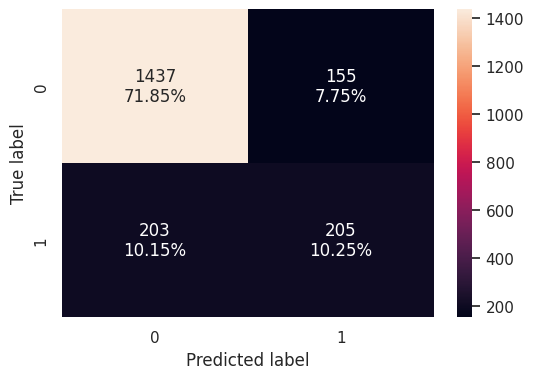

In [ ]:
confusion_matrix_sklearn(model4, X_val, y_val)

- The training loss decreased a little but the accuracy validation is not good.
- The model is overfitting to the training data.
- Next, I will try to use dropout technique.

### Model 5 - Neural Network with Adam Optimizer and Dropout

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model5 = Sequential()

model5.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model5.add(Dropout(0.4)) #dropout layer
model5.add(Dense(256, activation="tanh")) #hidden layer(256)
model5.add(Dropout(0.4)) #dropout layer
model5.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam() #Adam optimizer
model5.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model5.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7901 - loss: 0.4689 - val_accuracy: 0.8355 - val_loss: 0.3769
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 0.3903 - val_accuracy: 0.8430 - val_loss: 0.3664
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.3823 - val_accuracy: 0.8375 - val_loss: 0.3690
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8471 - loss: 0.3676 - val_accuracy: 0.8470 - val_loss: 0.3647
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.3740 - val_accuracy: 0.8500 - val_loss: 0.3625
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8456 - loss: 0.3622 - val_accuracy: 0.8470 - val_loss: 0.3628
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8512 - loss: 0.3643 - val_accuracy: 0.8475 - val_loss: 0.3588
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8517 - loss: 0.3515 - val_accuracy: 0.8535 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  37.056195974349976


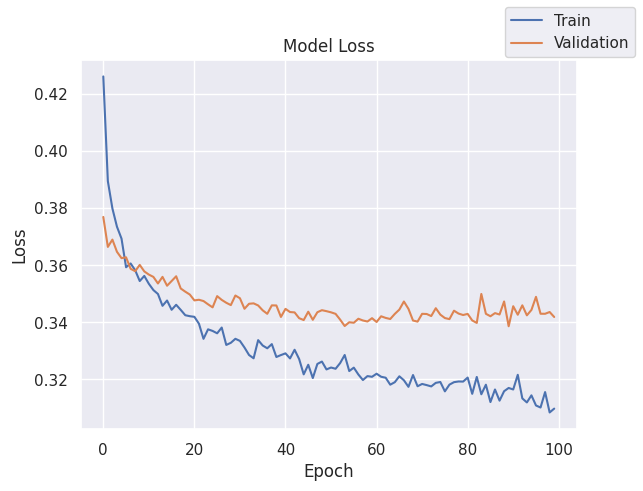

In [ ]:
plot(history, "loss")

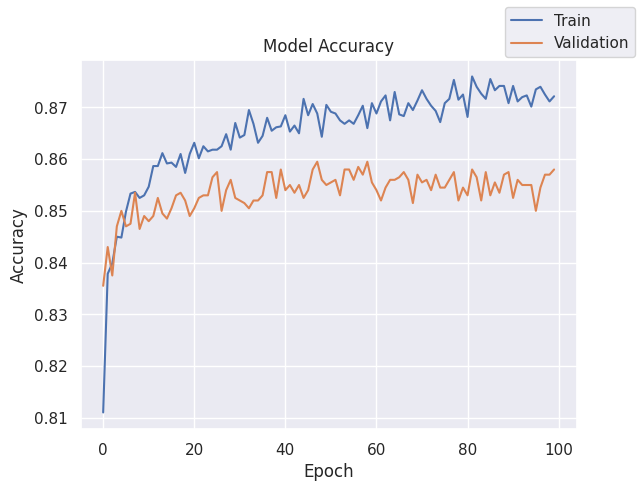

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[5] = [4,[128,256],['relu','tanh'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   
2                2               [128, 256]   
3                2               [128, 256]   
4                2               [128, 256]   
5                4               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   
2                        [relu, relu]       100          64   
3                        [relu, tanh]       100          64   
4                        [relu, tanh]       100          64   
5                        [relu, tanh]       100          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   
2                  -              -    0.336479         0.354381   
3                  -              -    0.336105         0.356086   
4                  -              -    0.203989         0.493901   
5                  -              -    0.309793         0.341882   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61  
2        0.861667               0.8490        34.36  
3        0.864500               0.8515        33.42  
4        0.918000               0.8210        35.54  
5        0.872167               0.8580        37.06

In [ ]:
model_5_train_perf = model_performance_classification(model5, X_train, y_train)
model_5_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.882167  0.882167   0.876668  0.873319

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


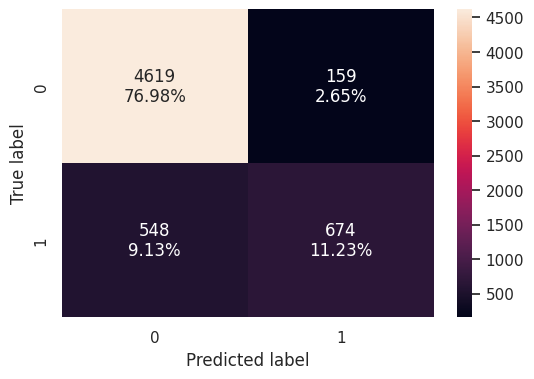

In [ ]:
confusion_matrix_sklearn(model5, X_train, y_train)

In [ ]:
model_5_val_perf = model_performance_classification(model5, X_val, y_val)
model_5_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.858   0.858    0.84776  0.846498

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


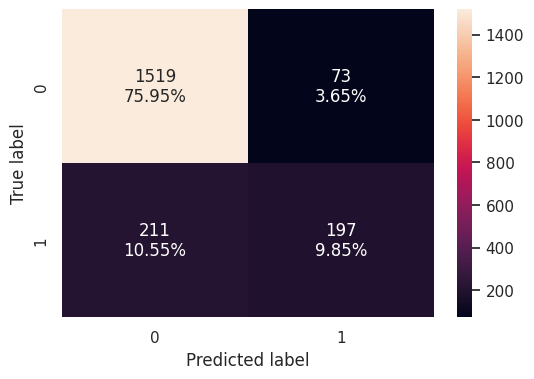

In [ ]:
confusion_matrix_sklearn(model5, X_val, y_val)

- The model is not good.
- The best model right now out of the all the previous ones is model 4.
- I tried the dropout but it did not improve.
- I will now try the learning rate and momentum.

### Model 6 - Neural Network with Adam Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model6 = Sequential()

model6.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model6.add(Dense(256, activation="tanh")) #hidden layer(256)
model6.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) #Adam optimizer
model6.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model6.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8039 - loss: 0.4633 - val_accuracy: 0.8435 - val_loss: 0.3644
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.3450 - val_accuracy: 0.8485 - val_loss: 0.3608
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.3364 - val_accuracy: 0.8495 - val_loss: 0.3559
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8609 - loss: 0.3469 - val_accuracy: 0.8515 - val_loss: 0.3806
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8684 - loss: 0.3355 - val_accuracy: 0.8480 - val_loss: 0.3479
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8635 - loss: 0.3359 - val_accuracy: 0.8505 - val_loss: 0.3549
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.3413 - val_accuracy: 0.8535 - val_loss: 0.3484
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8677 - loss: 0.3238 - val_accuracy: 0.8510 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  35.98533320426941


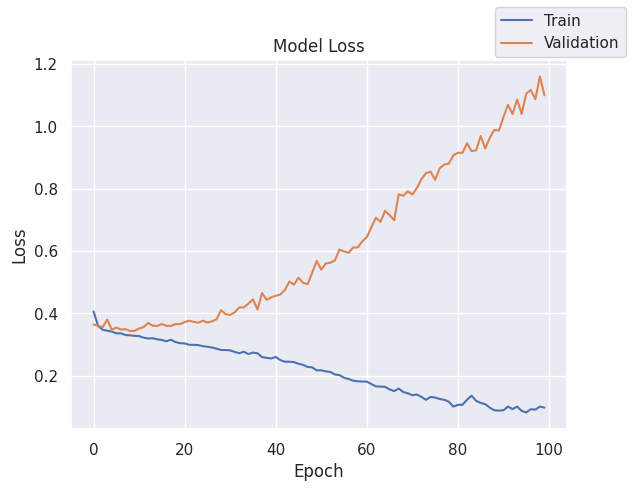

In [ ]:
plot(history, "loss")

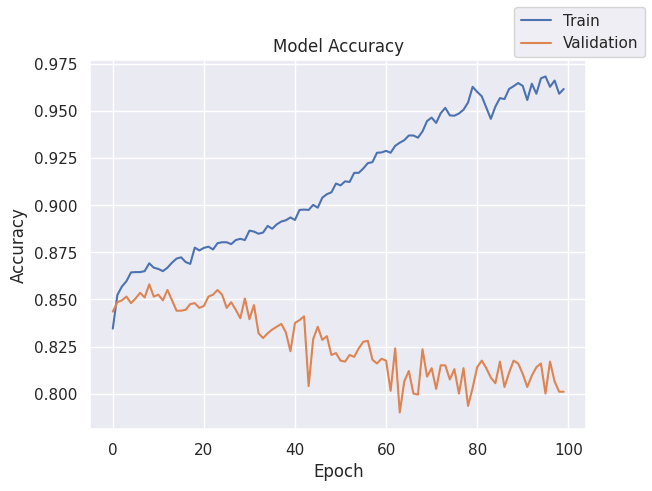

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[6] = [4,[128,256],['relu','tanh'],100,64,optimizer,[0.01,"-"],"-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   
2                2               [128, 256]   
3                2               [128, 256]   
4                2               [128, 256]   
5                4               [128, 256]   
6                4               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   
2                        [relu, relu]       100          64   
3                        [relu, tanh]       100          64   
4                        [relu, tanh]       100          64   
5                        [relu, tanh]       100          64   
6                        [relu, tanh]       100          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6  <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   
2                  -              -    0.336479         0.354381   
3                  -              -    0.336105         0.356086   
4                  -              -    0.203989         0.493901   
5                  -              -    0.309793         0.341882   
6                  -              -    0.098128         1.099000   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61  
2        0.861667               0.8490        34.36  
3        0.864500               0.8515        33.42  
4        0.918000               0.8210        35.54  
5        0.872167               0.8580        37.06  
6        0.961667               0.8010        35.99

In [ ]:
model_6_train_perf = model_performance_classification(model6, X_train, y_train)
model_6_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0     0.971   0.971   0.970804  0.970865

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


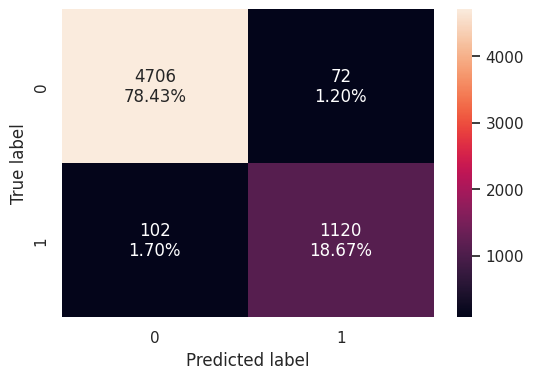

In [ ]:
confusion_matrix_sklearn(model6, X_train, y_train)

In [ ]:
model_6_val_perf = model_performance_classification(model6, X_val, y_val)
model_6_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.801   0.801   0.796723  0.798729

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


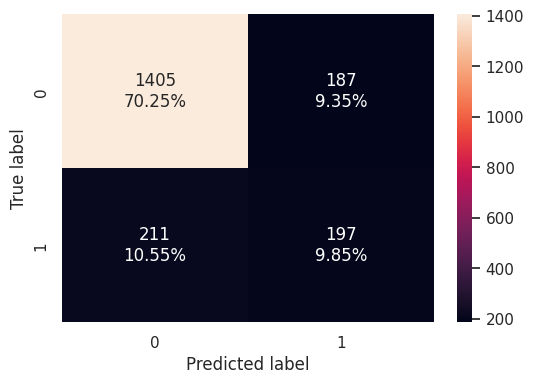

In [ ]:
confusion_matrix_sklearn(model6, X_val, y_val)

- The train loss decreased quite a bit, but the validation loss is increasing.
- This model is overfitting to the training data.
- I will remove the dropout layer and try to add the batch normalization layers.
- I will use tanh for the first hidden layer and relu for the second hidden layer.

### Model 7 - Neural Network with Adam Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model7 = Sequential()

model7.add(Dense(128, activation="relu", input_dim=X_train.shape[1], kernel_regularizer=l2(0.001))) #input & hidden layer(128)
model7.add(BatchNormalization()) #batch normalization layer
model7.add(Dropout(0.4)) #dropout layer
model7.add(Dense(256, activation="tanh", kernel_regularizer=l2(0.001))) #hidden layer(256)
model7.add(BatchNormalization()) #batch normalization layer
model7.add(Dropout(0.4)) #dropout layer
model7.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 35,841 (140.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
optimizer = tf.keras.optimizers.Adam() #Adam optimizer
model7.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model7.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.6521 - loss: 0.9213 - val_accuracy: 0.7975 - val_loss: 0.6123
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.6294 - val_accuracy: 0.8095 - val_loss: 0.5711
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8089 - loss: 0.6161 - val_accuracy: 0.8400 - val_loss: 0.5274
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8248 - loss: 0.5778 - val_accuracy: 0.8390 - val_loss: 0.5178
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8295 - loss: 0.5621 - val_accuracy: 0.8475 - val_loss: 0.5089
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.5317 - val_accuracy: 0.8425 - val_loss: 0.4903
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8429 - loss: 0.5066 - val_accuracy: 0.8495 - val_loss: 0.4804
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8477 - loss: 0.4898 - val_accuracy: 0.8480 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  42.23832964897156


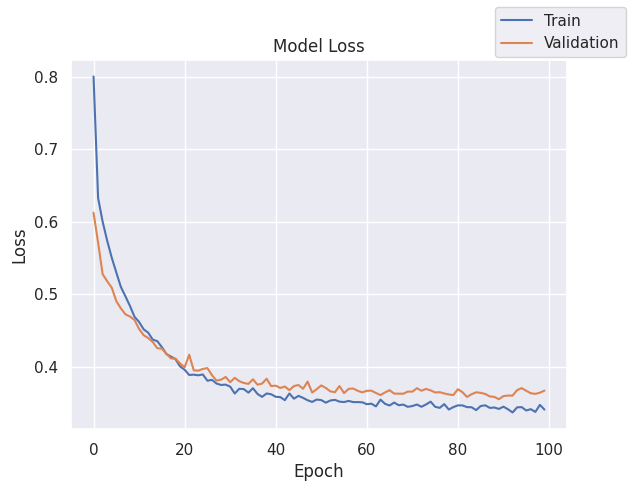

In [ ]:
plot(history, "loss")

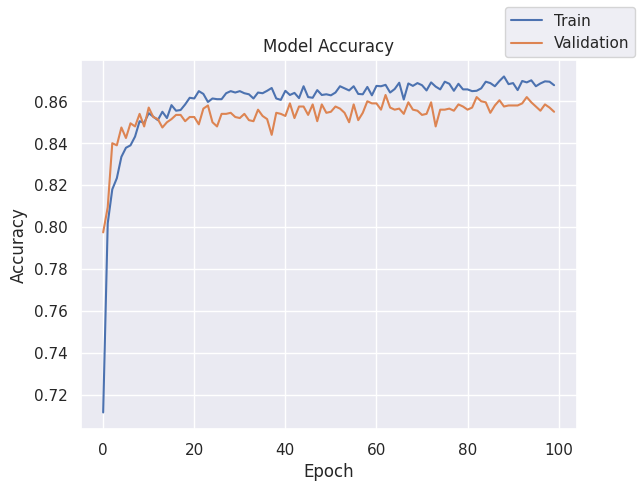

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[7] = [6,[128,256],['tanh','relu'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   
2                2               [128, 256]   
3                2               [128, 256]   
4                2               [128, 256]   
5                4               [128, 256]   
6                4               [128, 256]   
7                6               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   
2                        [relu, relu]       100          64   
3                        [relu, tanh]       100          64   
4                        [relu, tanh]       100          64   
5                        [relu, tanh]       100          64   
6                        [relu, tanh]       100          64   
7                        [tanh, relu]       100          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6  <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   
7  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   
2                  -              -    0.336479         0.354381   
3                  -              -    0.336105         0.356086   
4                  -              -    0.203989         0.493901   
5                  -              -    0.309793         0.341882   
6                  -              -    0.098128         1.099000   
7                  -              -    0.340736         0.366944   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61  
2        0.861667               0.8490        34.36  
3        0.864500               0.8515        33.42  
4        0.918000               0.8210        35.54  
5        0.872167               0.8580        37.06  
6        0.961667               0.8010        35.99  
7        0.867667               0.8550        42.24

In [ ]:
model_7_train_perf = model_performance_classification(model7, X_train, y_train)
model_7_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8765  0.8765   0.871688  0.864395

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


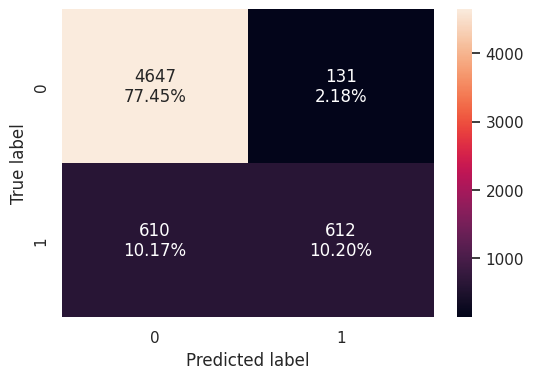

In [ ]:
confusion_matrix_sklearn(model7, X_train, y_train)

In [ ]:
model_7_val_perf = model_performance_classification(model7, X_val, y_val)
model_7_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.855   0.855   0.845665  0.837597

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


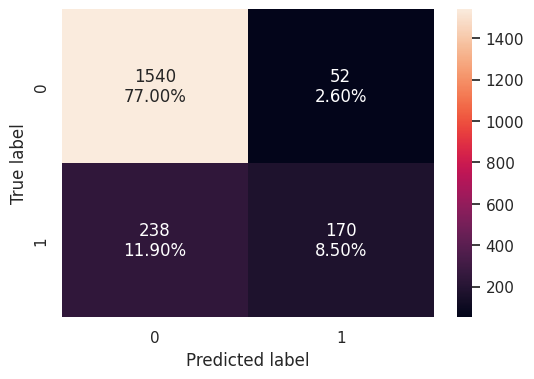

In [ ]:
confusion_matrix_sklearn(model7, X_val, y_val)

- The performance decreased slightly.
- I will now try to use the he weight initialization.

### Model 8 - Neural Network with Adam Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model8 = Sequential()

model8.add(Dense(128, activation="relu", input_dim=X_train.shape[1], kernel_initializer="he_normal", kernel_regularizer=l2(0.001))) #input & hidden layer(128), Xavier initialization
model8.add(BatchNormalization()) #batch normalization layer
model8.add(Dropout(0.4)) #dropout layer
model8.add(Dense(256, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2(0.001))) #hidden layer(256), Xavier initialization
model8.add(BatchNormalization()) #batch normalization layer
model8.add(Dropout(0.4)) #dropout layer
model8.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 35,841 (140.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
optimizer = tf.keras.optimizers.Adam() #Adam optimizer
model8.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model8.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6288 - loss: 1.5017 - val_accuracy: 0.8265 - val_loss: 1.0815
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7860 - loss: 1.1589 - val_accuracy: 0.8305 - val_loss: 1.0092
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8085 - loss: 1.0556 - val_accuracy: 0.8405 - val_loss: 0.9394
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.9845 - val_accuracy: 0.8480 - val_loss: 0.8872
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.9378 - val_accuracy: 0.8455 - val_loss: 0.8399
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 0.8782 - val_accuracy: 0.8510 - val_loss: 0.7973
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8408 - loss: 0.8036 - val_accuracy: 0.8475 - val_loss: 0.7573
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8323 - loss: 0.7914 - val_accuracy: 0.8495 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.121288776397705


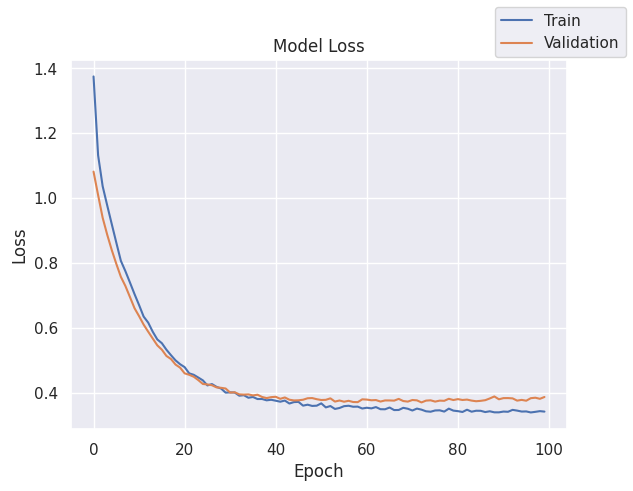

In [ ]:
plot(history, "loss")

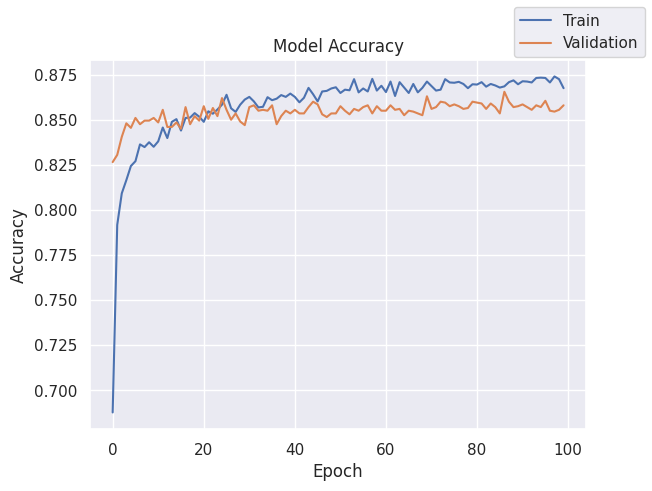

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[8] = [4,[128,256],['relu','tanh'],100,64,optimizer,"-","he_normal","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   
2                2               [128, 256]   
3                2               [128, 256]   
4                2               [128, 256]   
5                4               [128, 256]   
6                4               [128, 256]   
7                6               [128, 256]   
8                4               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   
2                        [relu, relu]       100          64   
3                        [relu, tanh]       100          64   
4                        [relu, tanh]       100          64   
5                        [relu, tanh]       100          64   
6                        [relu, tanh]       100          64   
7                        [tanh, relu]       100          64   
8                        [relu, tanh]       100          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6  <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   
7  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
8  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   
2                  -              -    0.336479         0.354381   
3                  -              -    0.336105         0.356086   
4                  -              -    0.203989         0.493901   
5                  -              -    0.309793         0.341882   
6                  -              -    0.098128         1.099000   
7                  -              -    0.340736         0.366944   
8          he_normal              -    0.342178         0.387185   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61  
2        0.861667               0.8490        34.36  
3        0.864500               0.8515        33.42  
4        0.918000               0.8210        35.54  
5        0.872167               0.8580        37.06  
6        0.961667               0.8010        35.99  
7        0.867667               0.8550        42.24  
8        0.867500               0.8580        41.12

In [ ]:
model_8_train_perf = model_performance_classification(model8, X_train, y_train)
model_8_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.886333  0.886333   0.883453  0.875826

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


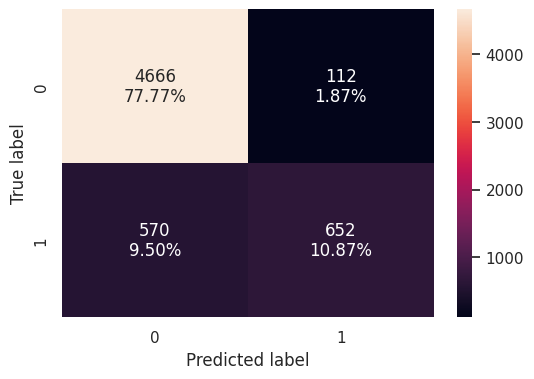

In [ ]:
confusion_matrix_sklearn(model8, X_train, y_train)

In [ ]:
model_8_val_perf = model_performance_classification(model8, X_val, y_val)
model_8_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.858   0.858   0.849107   0.84195

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


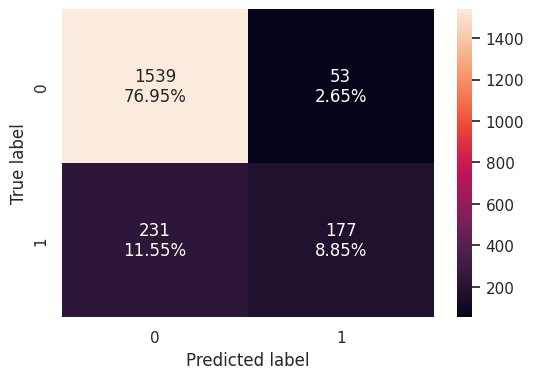

In [ ]:
confusion_matrix_sklearn(model8, X_val, y_val)

- Did not improve at all.
- I will try to use SGD optimizer with learning rate of 0.01

### Model 9 - Neural Network with SGD Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model9 = Sequential()

model9.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model9.add(Dense(256, activation="relu")) #hidden layer(256)
model9.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) #SGD optimizer with learning rate of 0.01 (higher than default)
model9.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model9.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7817 - loss: 0.6024 - val_accuracy: 0.7960 - val_loss: 0.5044
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 0.4884 - val_accuracy: 0.7960 - val_loss: 0.4748
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.4693 - val_accuracy: 0.7960 - val_loss: 0.4587
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.4537 - val_accuracy: 0.7960 - val_loss: 0.4464
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4407 - val_accuracy: 0.7965 - val_loss: 0.4365
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4401 - val_accuracy: 0.7975 - val_loss: 0.4283
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8072 - loss: 0.4212 - val_accuracy: 0.7980 - val_loss: 0.4214
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8091 - loss: 0.4078 - val_accuracy: 0.8025 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  32.76878261566162


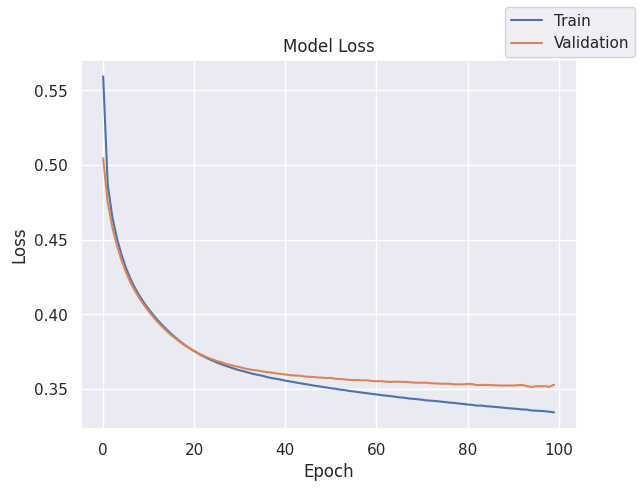

In [ ]:
plot(history, "loss")

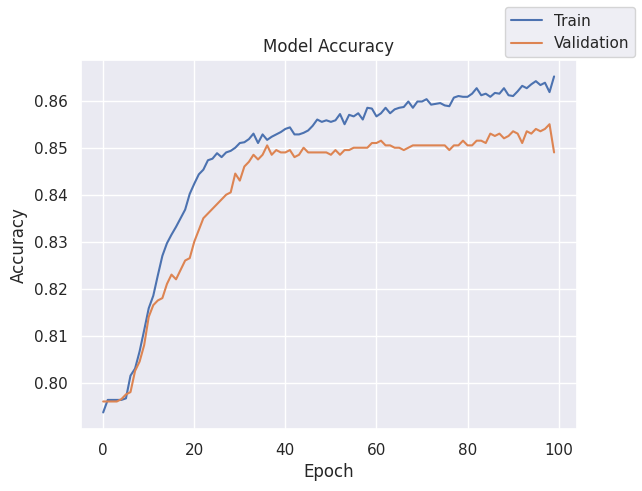

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[9] = [2,[128,256],['relu','relu'],100,64,optimizer,[0.01,"-"],"-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                2               [128, 256]   
1                2               [128, 256]   
2                2               [128, 256]   
3                2               [128, 256]   
4                2               [128, 256]   
5                4               [128, 256]   
6                4               [128, 256]   
7                6               [128, 256]   
8                4               [128, 256]   
9                2               [128, 256]   

  activation function - hidden layer   # epochs  batch size  \
0                        [relu, relu]        10          64   
1                        [relu, relu]        50          64   
2                        [relu, relu]       100          64   
3                        [relu, tanh]       100          64   
4                        [relu, tanh]       100          64   
5                        [relu, tanh]       100          64   
6                        [relu, tanh]       100          64   
7                        [tanh, relu]       100          64   
8                        [relu, tanh]       100          64   
9                        [relu, relu]       100          64   

                                           optimizer learning rate, momentum  \
0  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6  <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   
7  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
8  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
9  <keras.src.optimizers.sgd.SGD object at 0x7fa4...               [0.01, -]   

  weight initializer regularization  train loss  validation loss  \
0                  -              -    0.414997         0.410787   
1                  -              -    0.352437         0.359344   
2                  -              -    0.336479         0.354381   
3                  -              -    0.336105         0.356086   
4                  -              -    0.203989         0.493901   
5                  -              -    0.309793         0.341882   
6                  -              -    0.098128         1.099000   
7                  -              -    0.340736         0.366944   
8          he_normal              -    0.342178         0.387185   
9                  -              -    0.334385         0.352982   

   train accuracy  validation accuracy  time (secs)  
0        0.804667               0.8000         5.53  
1        0.853667               0.8475        16.61  
2        0.861667               0.8490        34.36  
3        0.864500               0.8515        33.42  
4        0.918000               0.8210        35.54  
5        0.872167               0.8580        37.06  
6        0.961667               0.8010        35.99  
7        0.867667               0.8550        42.24  
8        0.867500               0.8580        41.12  
9        0.865167               0.8490        32.77

In [ ]:
model_9_train_perf = model_performance_classification(model9, X_train, y_train)
model_9_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.864333  0.864333   0.857918  0.848486

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


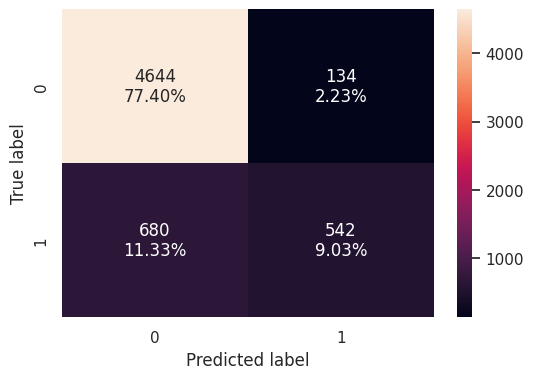

In [ ]:
confusion_matrix_sklearn(model9, X_train, y_train)

In [ ]:
model_9_val_perf = model_performance_classification(model9, X_val, y_val)
model_9_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.849   0.849   0.837711  0.830336

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


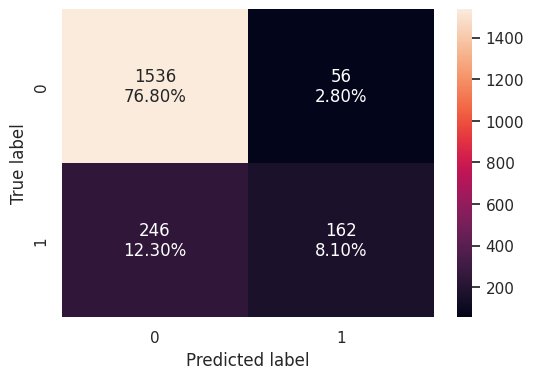

In [ ]:
confusion_matrix_sklearn(model9, X_val, y_val)

- Did not improve from the model 3 which I ran previously.
- I will now try to add another hidden layer still with just SGD optimizer.

### Model 10 - Neural Network with SGD Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model10 = Sequential()

model10.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model10.add(Dense(256, activation="relu")) #hidden layer(256)
model10.add(Dense(512, activation="relu")) #hidden layer(512)
model10.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,913 (652.00 KB)

 Trainable params: 166,913 (652.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD() #Adam optimizer
model10.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model10.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7709 - loss: 0.6001 - val_accuracy: 0.7960 - val_loss: 0.4928
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4844 - val_accuracy: 0.7960 - val_loss: 0.4711
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.4738 - val_accuracy: 0.7960 - val_loss: 0.4586
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.4496 - val_accuracy: 0.7960 - val_loss: 0.4479
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.4389 - val_accuracy: 0.7960 - val_loss: 0.4386
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.4361 - val_accuracy: 0.7960 - val_loss: 0.4305
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.4306 - val_accuracy: 0.7960 - val_loss: 0.4236
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4303 - val_accuracy: 0.7975 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  34.126139402389526


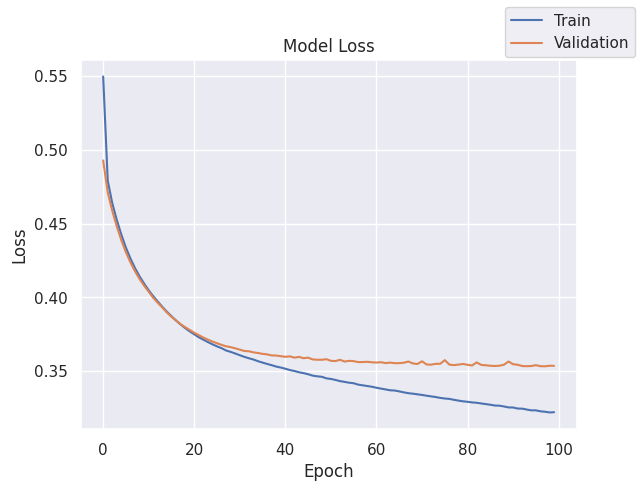

In [ ]:
plot(history, "loss")

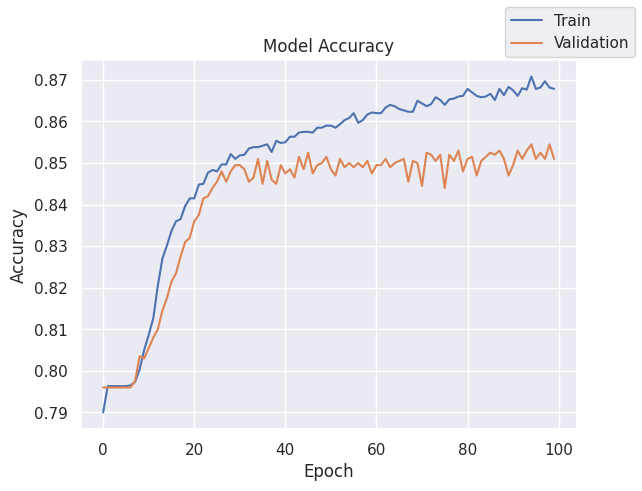

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[10] = [3,[128,256,512],['relu','relu','relu'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 2               [128, 256]   
1                 2               [128, 256]   
2                 2               [128, 256]   
3                 2               [128, 256]   
4                 2               [128, 256]   
5                 4               [128, 256]   
6                 4               [128, 256]   
7                 6               [128, 256]   
8                 4               [128, 256]   
9                 2               [128, 256]   
10                3          [128, 256, 512]   

   activation function - hidden layer   # epochs  batch size  \
0                         [relu, relu]        10          64   
1                         [relu, relu]        50          64   
2                         [relu, relu]       100          64   
3                         [relu, tanh]       100          64   
4                         [relu, tanh]       100          64   
5                         [relu, tanh]       100          64   
6                         [relu, tanh]       100          64   
7                         [tanh, relu]       100          64   
8                         [relu, tanh]       100          64   
9                         [relu, relu]       100          64   
10                  [relu, relu, relu]       100          64   

                                            optimizer learning rate, momentum  \
0   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6   <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   
7   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
8   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
9   <keras.src.optimizers.sgd.SGD object at 0x7fa4...               [0.01, -]   
10  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   

   weight initializer regularization  train loss  validation loss  \
0                   -              -    0.414997         0.410787   
1                   -              -    0.352437         0.359344   
2                   -              -    0.336479         0.354381   
3                   -              -    0.336105         0.356086   
4                   -              -    0.203989         0.493901   
5                   -              -    0.309793         0.341882   
6                   -              -    0.098128         1.099000   
7                   -              -    0.340736         0.366944   
8           he_normal              -    0.342178         0.387185   
9                   -              -    0.334385         0.352982   
10                  -              -    0.322073         0.353502   

    train accuracy  validation accuracy  time (secs)  
0         0.804667               0.8000         5.53  
1         0.853667               0.8475        16.61  
2         0.861667               0.8490        34.36  
3         0.864500               0.8515        33.42  
4         0.918000               0.8210        35.54  
5         0.872167               0.8580        37.06  
6         0.961667               0.8010        35.99  
7         0.867667               0.8550        42.24  
8         0.867500               0.8580        41.12  
9         0.865167               0.8490        32.77  
10        0.867833               0.8510        34.13

In [ ]:
model_10_train_perf = model_performance_classification(model10, X_train, y_train)
model_10_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.869833  0.869833   0.862748  0.857767

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


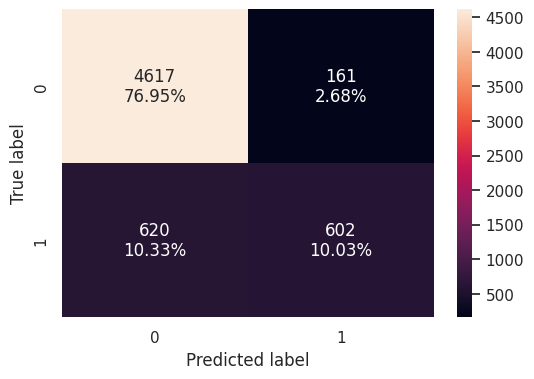

In [ ]:
confusion_matrix_sklearn(model10, X_train, y_train)

In [ ]:
model_10_val_perf = model_performance_classification(model10, X_val, y_val)
model_10_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.851   0.851   0.839153  0.836871

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


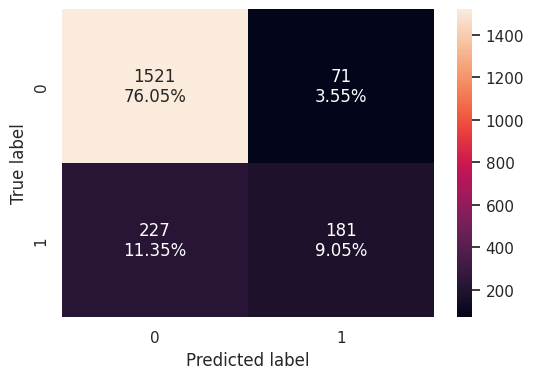

In [ ]:
confusion_matrix_sklearn(model10, X_val, y_val)

- Did not improve the metrics.
- Still overfitting.
- How can I improve the accuracy as well as decreasing the loss?
  - I can try to add a new hidden layer to the latest improved model for Adam optimizer.
  - I will also add Batch Normalization and Dropout layer.

### Model 11 - Neural Network with Adam Optimizer (continued)

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
model11 = Sequential()

model11.add(Dense(128, activation="relu", input_dim=X_train.shape[1])) #input & hidden layer(128)
model11.add(BatchNormalization()) #batch normalization layer
model11.add(Dropout(0.4)) #dropout
model11.add(Dense(256, activation="tanh")) #hidden layer(256)
model11.add(BatchNormalization()) #batch normalization layer
model11.add(Dropout(0.4)) #dropout
model11.add(Dense(512, activation="relu")) #hidden layer(512)
model11.add(BatchNormalization()) #batch normalization layer
model11.add(Dropout(0.4)) #dropout
model11.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,497 (666.00 KB)

 Trainable params: 168,705 (659.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005) #Adam optimizer
model11.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model11.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7222 - loss: 0.6905 - val_accuracy: 0.8105 - val_loss: 0.4287
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8317 - loss: 0.4038 - val_accuracy: 0.8390 - val_loss: 0.3709
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8303 - loss: 0.4030 - val_accuracy: 0.8435 - val_loss: 0.3643
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8442 - loss: 0.3795 - val_accuracy: 0.8515 - val_loss: 0.3534
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8437 - loss: 0.3822 - val_accuracy: 0.8445 - val_loss: 0.3757
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.3673 - val_accuracy: 0.8480 - val_loss: 0.3779
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8497 - loss: 0.3737 - val_accuracy: 0.8430 - val_loss: 0.3810
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8514 - loss: 0.3559 - val_accuracy: 0.8455 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  44.14449667930603


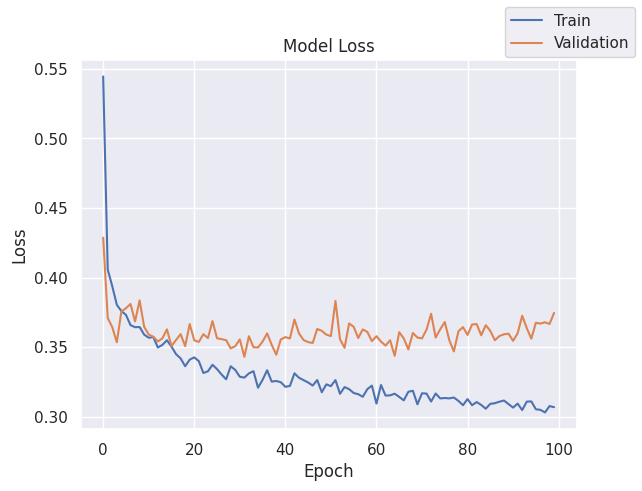

In [ ]:
plot(history, "loss")

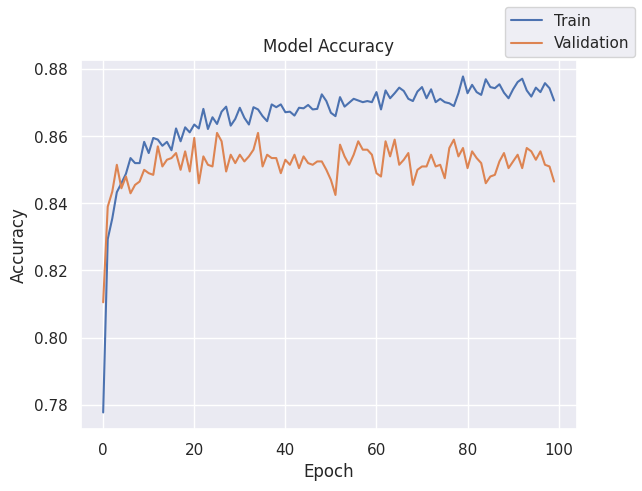

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[11] = [9,[128,256,512],['relu','tanh','relu'],100,64,optimizer,["0.005","-"],"-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 2               [128, 256]   
1                 2               [128, 256]   
2                 2               [128, 256]   
3                 2               [128, 256]   
4                 2               [128, 256]   
5                 4               [128, 256]   
6                 4               [128, 256]   
7                 6               [128, 256]   
8                 4               [128, 256]   
9                 2               [128, 256]   
10                3          [128, 256, 512]   
11                9          [128, 256, 512]   

   activation function - hidden layer   # epochs  batch size  \
0                         [relu, relu]        10          64   
1                         [relu, relu]        50          64   
2                         [relu, relu]       100          64   
3                         [relu, tanh]       100          64   
4                         [relu, tanh]       100          64   
5                         [relu, tanh]       100          64   
6                         [relu, tanh]       100          64   
7                         [tanh, relu]       100          64   
8                         [relu, tanh]       100          64   
9                         [relu, relu]       100          64   
10                  [relu, relu, relu]       100          64   
11                  [relu, tanh, relu]       100          64   

                                            optimizer learning rate, momentum  \
0   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6   <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   
7   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
8   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
9   <keras.src.optimizers.sgd.SGD object at 0x7fa4...               [0.01, -]   
10  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
11  <keras.src.optimizers.adam.Adam object at 0x7f...              [0.005, -]   

   weight initializer regularization  train loss  validation loss  \
0                   -              -    0.414997         0.410787   
1                   -              -    0.352437         0.359344   
2                   -              -    0.336479         0.354381   
3                   -              -    0.336105         0.356086   
4                   -              -    0.203989         0.493901   
5                   -              -    0.309793         0.341882   
6                   -              -    0.098128         1.099000   
7                   -              -    0.340736         0.366944   
8           he_normal              -    0.342178         0.387185   
9                   -              -    0.334385         0.352982   
10                  -              -    0.322073         0.353502   
11                  -              -    0.306803         0.374615   

    train accuracy  validation accuracy  time (secs)  
0         0.804667               0.8000         5.53  
1         0.853667               0.8475        16.61  
2         0.861667               0.8490        34.36  
3         0.864500               0.8515        33.42  
4         0.918000               0.8210        35.54  
5         0.872167               0.8580        37.06  
6         0.961667               0.8010        35.99  
7         0.867667               0.8550        42.24  
8         0.867500               0.8580        41.12  
9         0.865167               0.8490     

In [ ]:
model_11_train_perf = model_performance_classification(model11, X_train, y_train)
model_11_train_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Accuracy    Recall  Precision  F1 Score
0  0.889833  0.889833   0.892077  0.877125

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


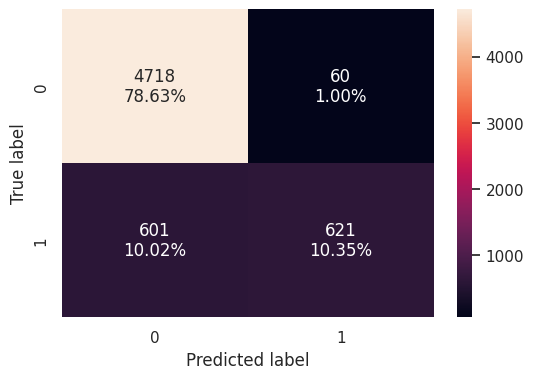

In [ ]:
confusion_matrix_sklearn(model11, X_train, y_train)

In [ ]:
model_11_val_perf = model_performance_classification(model11, X_val, y_val)
model_11_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8465  0.8465   0.836651  0.823593

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


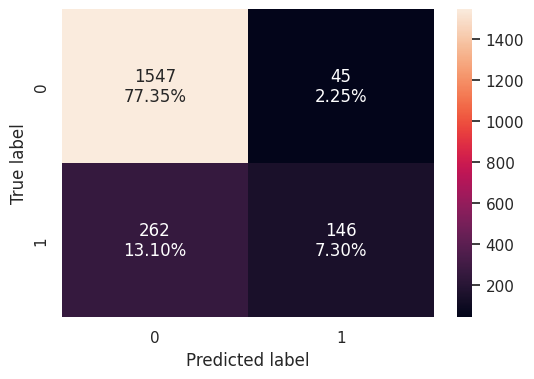

In [ ]:
confusion_matrix_sklearn(model11, X_val, y_val)

- The metrics did not improve much.
- I will now use regularization techniques to prevent overfitting.

### Model 12 - Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
model12 = Sequential()

model12.add(Dense(128, activation="relu", input_dim=X_train_over.shape[1])) #input & hidden layer(128)
model12.add(BatchNormalization()) #batch normalization layer
model12.add(Dropout(0.3)) #dropout
model12.add(Dense(256, activation="sigmoid")) #hidden layer(256)
model12.add(BatchNormalization()) #batch normalization layer
model12.add(Dropout(0.3)) #dropout
model12.add(Dense(512, activation="relu")) #hidden layer(512)
model12.add(BatchNormalization()) #batch normalization layer
model12.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,497 (666.00 KB)

 Trainable params: 168,705 (659.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
optimizer = tf.keras.optimizers.SGD() #Adam optimizer
model12.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model12.fit(
    X_train_over,
    y_train_over,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6624 - loss: 0.6535 - val_accuracy: 0.3755 - val_loss: 0.7361
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7380 - loss: 0.5279 - val_accuracy: 0.5685 - val_loss: 0.6859
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7562 - loss: 0.5090 - val_accuracy: 0.6975 - val_loss: 0.5597
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7745 - loss: 0.4841 - val_accuracy: 0.7405 - val_loss: 0.5158
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7755 - loss: 0.4793 - val_accuracy: 0.7520 - val_loss: 0.5036
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7768 - loss: 0.4776 - val_accuracy: 0.7440 - val_loss: 0.5121
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7790 - loss: 0.4728 - val_accuracy: 0.7550 - val_loss: 0.4969
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7740 - loss: 0.4623 - val_acc

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  51.13896584510803


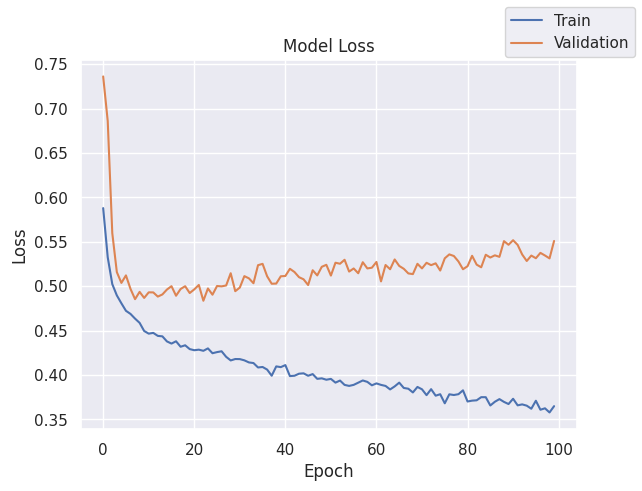

In [ ]:
plot(history, "loss")

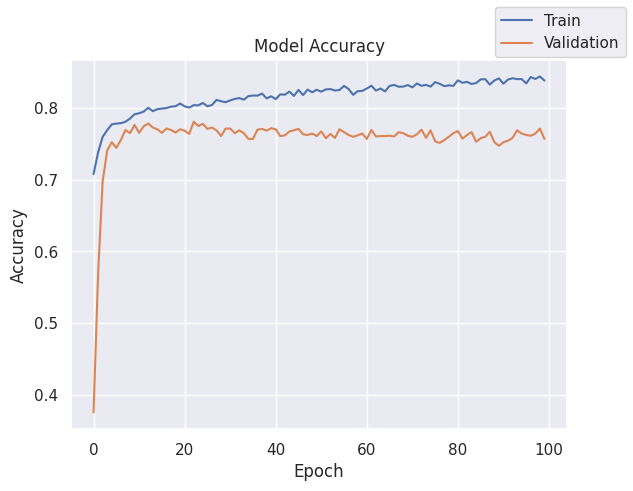

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[12] = [8,[128,256,512],['relu','sigmoid','relu'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 2               [128, 256]   
1                 2               [128, 256]   
2                 2               [128, 256]   
3                 2               [128, 256]   
4                 2               [128, 256]   
5                 4               [128, 256]   
6                 4               [128, 256]   
7                 6               [128, 256]   
8                 4               [128, 256]   
9                 2               [128, 256]   
10                3          [128, 256, 512]   
11                9          [128, 256, 512]   
12                8          [128, 256, 512]   

   activation function - hidden layer   # epochs  batch size  \
0                         [relu, relu]        10          64   
1                         [relu, relu]        50          64   
2                         [relu, relu]       100          64   
3                         [relu, tanh]       100          64   
4                         [relu, tanh]       100          64   
5                         [relu, tanh]       100          64   
6                         [relu, tanh]       100          64   
7                         [tanh, relu]       100          64   
8                         [relu, tanh]       100          64   
9                         [relu, relu]       100          64   
10                  [relu, relu, relu]       100          64   
11                  [relu, tanh, relu]       100          64   
12               [relu, sigmoid, relu]       100          64   

                                            optimizer learning rate, momentum  \
0   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6   <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   
7   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
8   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
9   <keras.src.optimizers.sgd.SGD object at 0x7fa4...               [0.01, -]   
10  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
11  <keras.src.optimizers.adam.Adam object at 0x7f...              [0.005, -]   
12  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   

   weight initializer regularization  train loss  validation loss  \
0                   -              -    0.414997         0.410787   
1                   -              -    0.352437         0.359344   
2                   -              -    0.336479         0.354381   
3                   -              -    0.336105         0.356086   
4                   -              -    0.203989         0.493901   
5                   -              -    0.309793         0.341882   
6                   -              -    0.098128         1.099000   
7                   -              -    0.340736         0.366944   
8           he_normal              -    0.342178         0.387185   
9                   -              -    0.334385         0.352982   
10                  -              -    0.322073         0.353502   
11                  -              -    0.306803         0.374615   
12                  -              -    0.364849         0.550857   

    train accuracy  validation accuracy  time (secs)  
0         0.804667               0.8000         5.53  
1         0.853667               0.8475        16.61  
2         0.861667               0.8490        34.36  
3         0.864500               0.8515        33.42  
4         0.918000               0.8210        35.54  
5 

In [ ]:
model_12_train_over_perf = model_performance_classification(model12, X_train_over, y_train_over)
model_12_train_over_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.87275  0.87275   0.882636  0.871923

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


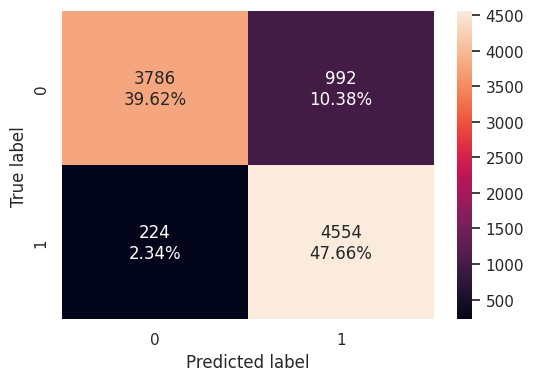

In [ ]:
confusion_matrix_sklearn(model12, X_train_over, y_train_over)

In [ ]:
model_12_val_perf = model_performance_classification(model12, X_val, y_val)
model_12_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Accuracy  Recall  Precision  F1 Score
0    0.7565  0.7565    0.82596  0.776188

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


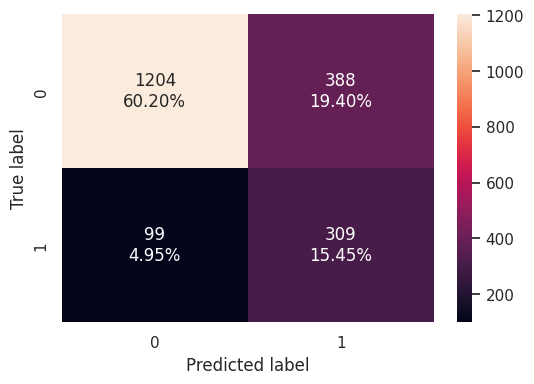

In [ ]:
confusion_matrix_sklearn(model12, X_val, y_val)

### Model 13 - Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
model13 = Sequential()

model13.add(Dense(128, activation="relu", input_dim=X_train_over.shape[1])) #input & hidden layer(128)
model13.add(Dense(256, activation="tanh")) #hidden layer(256)
model13.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model13.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,073 (137.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam() #Adam optimizer
model13.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model13.fit(
    X_train_over,
    y_train_over,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7236 - loss: 0.5360 - val_accuracy: 0.7555 - val_loss: 0.4997
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.4541 - val_accuracy: 0.8095 - val_loss: 0.4347
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4383 - val_accuracy: 0.8040 - val_loss: 0.4298
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8183 - loss: 0.4067 - val_accuracy: 0.7960 - val_loss: 0.4465
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 0.4106 - val_accuracy: 0.8155 - val_loss: 0.4194
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8219 - loss: 0.4000 - val_accuracy: 0.7960 - val_loss: 0.4410
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8266 - loss: 0.3822 - val_accuracy: 0.7980 - val_loss: 0.4635
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8294 - loss: 0.3802 - val_accu

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  46.6323938369751


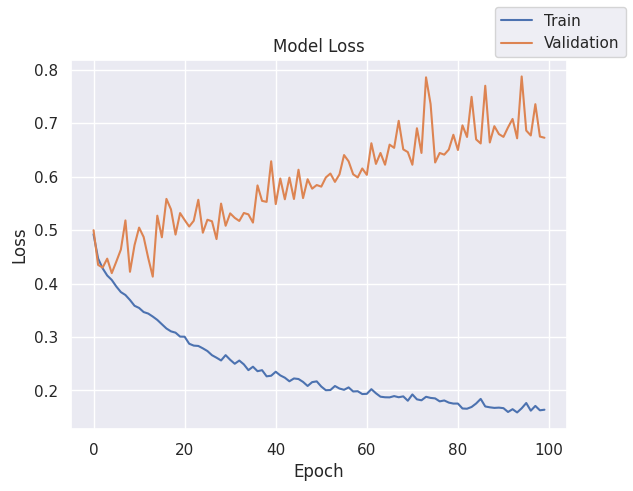

In [ ]:
plot(history, "loss")

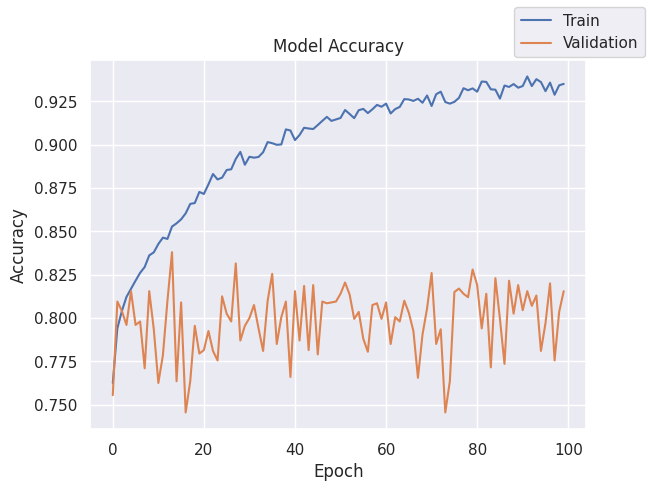

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[13] = [2,[128,256],['relu','tanh'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 2               [128, 256]   
1                 2               [128, 256]   
2                 2               [128, 256]   
3                 2               [128, 256]   
4                 2               [128, 256]   
5                 4               [128, 256]   
6                 4               [128, 256]   
7                 6               [128, 256]   
8                 4               [128, 256]   
9                 2               [128, 256]   
10                3          [128, 256, 512]   
11                9          [128, 256, 512]   
12                8          [128, 256, 512]   
13                2               [128, 256]   

   activation function - hidden layer   # epochs  batch size  \
0                         [relu, relu]        10          64   
1                         [relu, relu]        50          64   
2                         [relu, relu]       100          64   
3                         [relu, tanh]       100          64   
4                         [relu, tanh]       100          64   
5                         [relu, tanh]       100          64   
6                         [relu, tanh]       100          64   
7                         [tanh, relu]       100          64   
8                         [relu, tanh]       100          64   
9                         [relu, relu]       100          64   
10                  [relu, relu, relu]       100          64   
11                  [relu, tanh, relu]       100          64   
12               [relu, sigmoid, relu]       100          64   
13                        [relu, tanh]       100          64   

                                            optimizer learning rate, momentum  \
0   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6   <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   
7   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
8   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
9   <keras.src.optimizers.sgd.SGD object at 0x7fa4...               [0.01, -]   
10  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
11  <keras.src.optimizers.adam.Adam object at 0x7f...              [0.005, -]   
12  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
13  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   

   weight initializer regularization  train loss  validation loss  \
0                   -              -    0.414997         0.410787   
1                   -              -    0.352437         0.359344   
2                   -              -    0.336479         0.354381   
3                   -              -    0.336105         0.356086   
4                   -              -    0.203989         0.493901   
5                   -              -    0.309793         0.341882   
6                   -              -    0.098128         1.099000   
7                   -              -    0.340736         0.366944   
8           he_normal              -    0.342178         0.387185   
9                   -              -    0.334385         0.352982   
10                  -              -    0.322073         0.353502   
11                  -              -    0.306803         0.374615   
12                  -              -    0.364849         0.550857   
13                  -              -    0.163982         0.672592   

    train accuracy  validation accuracy  time (secs)  
0         0.804

In [ ]:
model_13_train_over_perf = model_performance_classification(model13, X_train_over, y_train_over)
model_13_train_over_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.953118  0.953118   0.953195  0.953116

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


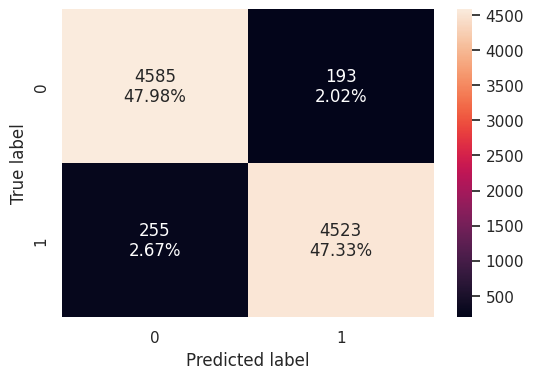

In [ ]:
confusion_matrix_sklearn(model13, X_train_over, y_train_over)

In [ ]:
model_13_val_perf = model_performance_classification(model13, X_val, y_val)
model_13_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8155  0.8155   0.811728  0.813486

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


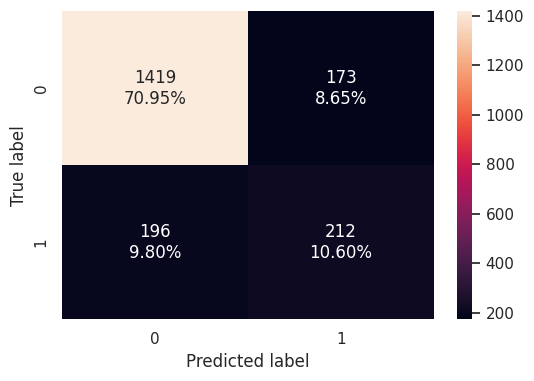

In [ ]:
confusion_matrix_sklearn(model13, X_val, y_val)

### Model 14 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
tf.keras.backend.clear_session() #clears current session, resetting all layers and model, freeing up memory

In [ ]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
model14 = Sequential()

model14.add(Dense(128, activation="relu", input_dim=X_train_over.shape[1])) #input & hidden layer(17)
model14.add(BatchNormalization()) #batch normalization layer
model14.add(Dropout(0.4)) #dropout
model14.add(Dense(256, activation="relu")) #hidden layer(8)
model14.add(Dense(1, activation="sigmoid")) #output layer(1 neuron)

In [ ]:
model14.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,585 (139.00 KB)

 Trainable params: 35,329 (138.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
optimizer = tf.keras.optimizers.Adam() #Adam optimizer
model14.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
batch_size = 64 #batch size
epochs = 100 #epochs

start = time.time() #starting time

history = model14.fit(
    X_train_over,
    y_train_over,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)

end = time.time() #ending time

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7204 - loss: 0.5528 - val_accuracy: 0.7720 - val_loss: 0.5360
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7747 - loss: 0.4690 - val_accuracy: 0.7835 - val_loss: 0.4747
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.4509 - val_accuracy: 0.8095 - val_loss: 0.4211
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.4386 - val_accuracy: 0.8045 - val_loss: 0.4378
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8095 - loss: 0.4102 - val_accuracy: 0.7925 - val_loss: 0.4483
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8042 - loss: 0.4186 - val_accuracy: 0.7950 - val_loss: 0.4486
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8177 - loss: 0.4095 - val_accuracy: 0.8080 - val_loss: 0.4289
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8112 - loss: 0.4144 - val_acc

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  49.8084933757782


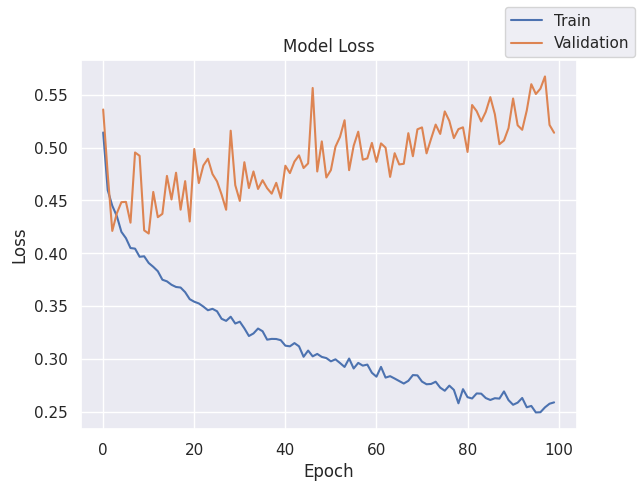

In [ ]:
plot(history, "loss")

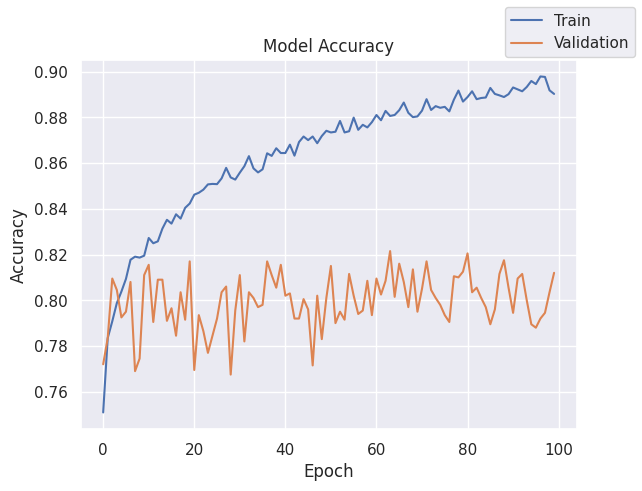

In [ ]:
plot(history, "accuracy")

In [ ]:
results.loc[14] = [4,[128,256],['relu','relu'],100,64,optimizer,"-","-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                 2               [128, 256]   
1                 2               [128, 256]   
2                 2               [128, 256]   
3                 2               [128, 256]   
4                 2               [128, 256]   
5                 4               [128, 256]   
6                 4               [128, 256]   
7                 6               [128, 256]   
8                 4               [128, 256]   
9                 2               [128, 256]   
10                3          [128, 256, 512]   
11                9          [128, 256, 512]   
12                8          [128, 256, 512]   
13                2               [128, 256]   
14                4               [128, 256]   

   activation function - hidden layer   # epochs  batch size  \
0                         [relu, relu]        10          64   
1                         [relu, relu]        50          64   
2                         [relu, relu]       100          64   
3                         [relu, tanh]       100          64   
4                         [relu, tanh]       100          64   
5                         [relu, tanh]       100          64   
6                         [relu, tanh]       100          64   
7                         [tanh, relu]       100          64   
8                         [relu, tanh]       100          64   
9                         [relu, relu]       100          64   
10                  [relu, relu, relu]       100          64   
11                  [relu, tanh, relu]       100          64   
12               [relu, sigmoid, relu]       100          64   
13                        [relu, tanh]       100          64   
14                        [relu, relu]       100          64   

                                            optimizer learning rate, momentum  \
0   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
1   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
2   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
3   <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
4   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
5   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
6   <keras.src.optimizers.adam.Adam object at 0x7f...               [0.01, -]   
7   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
8   <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
9   <keras.src.optimizers.sgd.SGD object at 0x7fa4...               [0.01, -]   
10  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
11  <keras.src.optimizers.adam.Adam object at 0x7f...              [0.005, -]   
12  <keras.src.optimizers.sgd.SGD object at 0x7fa4...                       -   
13  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   
14  <keras.src.optimizers.adam.Adam object at 0x7f...                       -   

   weight initializer regularization  train loss  validation loss  \
0                   -              -    0.414997         0.410787   
1                   -              -    0.352437         0.359344   
2                   -              -    0.336479         0.354381   
3                   -              -    0.336105         0.356086   
4                   -              -    0.203989         0.493901   
5                   -              -    0.309793         0.341882   
6                   -              -    0.098128         1.099000   
7                   -              -    0.340736         0.366944   
8           he_normal              -    0.342178         0.387185   
9                   -              -    0.334385         0.352982   
10                  -              -    0.322073         0.353502   
11                  -              -    0.306803         0.374615   
12              

In [ ]:
model_14_train_over_perf = model_performance_classification(model14, X_train_over, y_train_over)
model_14_train_over_perf

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.95113  0.95113    0.95147  0.951121

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


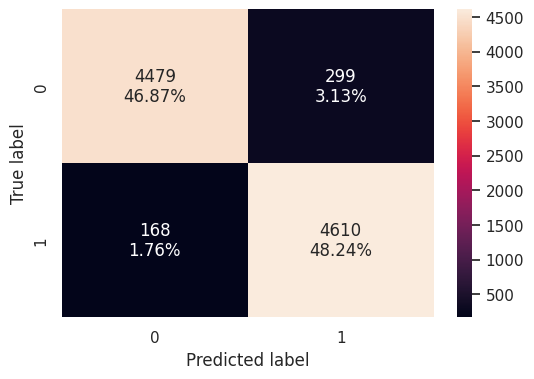

In [ ]:
confusion_matrix_sklearn(model14, X_train_over, y_train_over)

In [ ]:
model_14_val_perf = model_performance_classification(model14, X_val, y_val)
model_14_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy  Recall  Precision  F1 Score
0     0.812   0.812   0.819491  0.815345

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


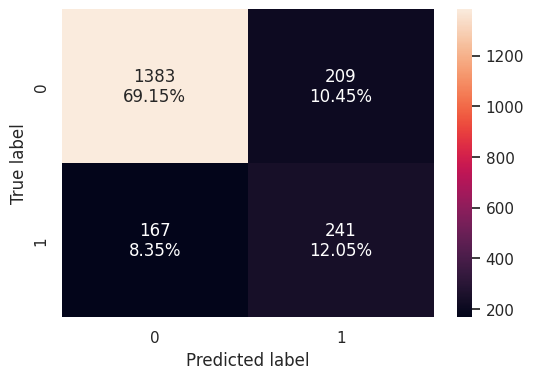

In [ ]:
confusion_matrix_sklearn(model14, X_val, y_val)

## Model Performance Comparison and Final Model Selection

In [ ]:
models_train_comp_df = pd.concat([
    model_0_train_perf.T,
    model_1_train_perf.T,
    model_2_train_perf.T,
    model_3_train_perf.T,
    model_4_train_perf.T,
    model_5_train_perf.T,
    model_6_train_perf.T,
    model_7_train_perf.T,
    model_8_train_perf.T,
    model_9_train_perf.T,
    model_10_train_perf.T,
    model_11_train_perf.T,
    model_12_train_over_perf.T,
    model_13_train_over_perf.T,
    model_14_train_over_perf.T
], axis=1)

models_train_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
    "Model 7",
    "Model 8",
    "Model 9",
    "Model 10",
    "Model 11",
    "Model 12",
    "Model 13",
    "Model 14"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5  \
Accuracy   0.806000  0.854500  0.861667  0.864833  0.925000  0.882167   
Recall     0.806000  0.854500  0.861667  0.864833  0.925000  0.882167   
Precision  0.778758  0.843452  0.852541  0.856869  0.923320  0.876668   
F1 Score   0.744559  0.841240  0.848661  0.851439  0.923763  0.873319   

            Model 6   Model 7   Model 8   Model 9  Model 10  Model 11  \
Accuracy   0.971000  0.876500  0.886333  0.864333  0.869833  0.889833   
Recall     0.971000  0.876500  0.886333  0.864333  0.869833  0.889833   
Precision  0.970804  0.871688  0.883453  0.857918  0.862748  0.892077   
F1 Score   0.970865  0.864395  0.875826  0.848486  0.857767  0.877125   

           Model 12  Model 13  Model 14  
Accuracy   0.872750  0.953118  0.951130  
Recall     0.872750  0.953118  0.951130  
Precision  0.882636  0.953195  0.951470  
F1 Score   0.871923  0.953116  0.951121

In [ ]:
models_validation_comp_df = pd.concat([
    model_0_val_perf.T,
    model_1_val_perf.T,
    model_2_val_perf.T,
    model_3_val_perf.T,
    model_4_val_perf.T,
    model_5_val_perf.T,
    model_6_val_perf.T,
    model_7_val_perf.T,
    model_8_val_perf.T,
    model_9_val_perf.T,
    model_10_val_perf.T,
    model_11_val_perf.T,
    model_12_val_perf.T,
    model_13_val_perf.T,
    model_14_val_perf.T
], axis=1)

models_validation_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
    "Model 7",
    "Model 8",
    "Model 9",
    "Model 10",
    "Model 11",
    "Model 12",
    "Model 13",
    "Model 14"
]

print("Testing performance comparison:")
models_validation_comp_df

Testing performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5  \
Accuracy   0.800000  0.847500  0.849000  0.851500  0.821000  0.858000   
Recall     0.800000  0.847500  0.849000  0.851500  0.821000  0.858000   
Precision  0.758361  0.834748  0.836622  0.840196  0.813637  0.847760   
F1 Score   0.734796  0.832180  0.834920  0.835349  0.816735  0.846498   

            Model 6   Model 7   Model 8   Model 9  Model 10  Model 11  \
Accuracy   0.801000  0.855000  0.858000  0.849000  0.851000  0.846500   
Recall     0.801000  0.855000  0.858000  0.849000  0.851000  0.846500   
Precision  0.796723  0.845665  0.849107  0.837711  0.839153  0.836651   
F1 Score   0.798729  0.837597  0.841950  0.830336  0.836871  0.823593   

           Model 12  Model 13  Model 14  
Accuracy   0.756500  0.815500  0.812000  
Recall     0.756500  0.815500  0.812000  
Precision  0.825960  0.811728  0.819491  
F1 Score   0.776188  0.813486  0.815345

- Models 12 - 14 are not a good choice for the final selection. Those models are clearly highly overfitted to the training data.
- Models 1, 3, 9 are good models to select. Even though, they are slightly overfitting it is a good choice.

- Model 9 is my final selection for picking the model.
- It has pretty good metrics.

###Test Set Final Performance

In [ ]:
model_9_test_perf = model_performance_classification(model9, X_test, y_test)
model_9_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0      0.86    0.86   0.852606  0.842878

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


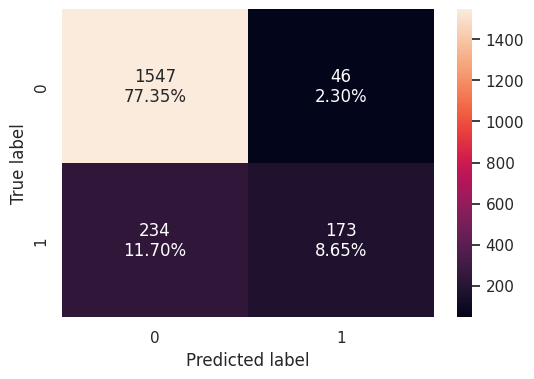

In [ ]:
confusion_matrix_sklearn(model9, X_test, y_test)

- Model 9 has a 86% on the recall test set.

## Actionable Insights and Business Recommendations

- The credit score is a bit left skewed.
- Atleast 300 records have the highest credit scores.
- 50% of credit scores is between 600 and 700.
- If you look closely you can see there is a bell shaped curve, if you ignore the few records to the left.
- The majority of the customers are from France.
- Germany and Spain are almost equal to each other.
- The majority of the customers are male.
- Females are not so bad they are almost catching up to the males.
- There is an outlier to the far right that is the highest age of the customer.
- The age is right skewed, which means there are a lot of customers who are young or middle aged.
- There are 800+ records where the age is around 38-41 year olds, this is the highest age group.
- The second highest age group is 25-29 year olds.
- 413 of the customers spend 0 years with the bank. I think they recently joined the bank or they left before the first year.
- 10 years was how long they spent with the bank, which is the longest time period.
- 3,500 customers have 0 dollars.
- If you look in the middle, you will see a bell curve.
- As the balance increases after 150K there are less customers who have a bank balance that have 150K+ money.
- There are 5,084 customers who purchased 1 product from the bank.
- Only 60 customers purchased 4 products from the bank.
- 7,055 customers have credit cards.
- 2,945 customers do not have credit cards.
- 4,849 customers who are not an active members.
- 5,151 customers who are active members.
- 50% of the customers have an estimated salary of 100,000 dollars.
- 450+ and less than 500 sustomers have an estimated salary of 200,000 dollars.
- There are 7,963 records who did not leave the bank.
- There are 2,036 records who left the bank.
- There is a huge imbalance in the target variables. We will have to fix it with SMOTE or Under sampling.
- Model 9 is my final selection for picking the model.
- It has pretty good metrics.
- Focus more on the younger population rather than 60+.
- Younger customers are more likely to stay with a bank since they might have some responsibilities in their lives.



<font size=6 color='blue'>Power Ahead</font>
___

In [ ]:
#convert to html
!jupyter nbconvert --to html /content/INN_Learner_Notebook_Full_code.ipynb

[NbConvertApp] Converting notebook /content/INN_Learner_Notebook_Full_code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 101 image(s).
[NbConvertApp] Writing 5645407 bytes to /content/INN_Learner_Notebook_Full_code.html
